# A Network of Thrones - All Seasons 1-8 Combined

---



**Marco Uderzo, ID 2096998**


marco.uderzo@studenti.unipd.it

In [1]:
!pip install igraph
!pip install cairocffi
!pip install scikit-network
!pip install networkx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 42.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import itertools
import networkx as nx
import igraph as ig
import ast
import cairocffi as cairo
import random
import math
import json
import numpy as np
import matplotlib.pyplot as plt
from sknetwork.clustering import get_modularity

In [3]:
from google.colab import drive
drive.mount('/content/drive')
folder = 'drive/MyDrive/NetworkScience/'

Mounted at /content/drive


In [4]:
edges = [folder + 'data/got-s1-edges.csv',
         folder + 'data/got-s2-edges.csv',
         folder + 'data/got-s3-edges.csv',
         folder + 'data/got-s4-edges.csv',
         folder + 'data/got-s5-edges.csv',
         folder + 'data/got-s6-edges.csv',
         folder + 'data/got-s7-edges.csv',
         folder + 'data/got-s8-edges.csv']

nodes = [folder + 'data/got-s1-nodes.csv',
         folder + 'data/got-s2-nodes.csv',
         folder + 'data/got-s3-nodes.csv',
         folder + 'data/got-s4-nodes.csv',
         folder + 'data/got-s5-nodes.csv',
         folder + 'data/got-s6-nodes.csv',
         folder + 'data/got-s7-nodes.csv',
         folder + 'data/got-s8-nodes.csv']


# Step 2: Load and merge edge data
edges_df = [pd.read_csv(file) for file in edges]
relations_df = pd.concat(edges_df, ignore_index=True)

# Ensure that for each edge (u, v), (v, u) is considered the same
relations_df[['Source', 'Target']] = pd.DataFrame(np.sort(relations_df[['Source', 'Target']], axis=1))

# Step 3: Load and merge node data
nodes_df = [pd.read_csv(file) for file in nodes]
merged_nodes_df = pd.concat(nodes_df).drop_duplicates(subset='Id')


# Add all the edges from the merged edge DataFrame
G = nx.from_pandas_edgelist(relations_df, 'Source', 'Target', ['Weight'])

# Add nodes with attributes from the merged node DataFrame
characters = merged_nodes_df.set_index('Id').to_dict('index')
G.add_nodes_from(characters.items())

# Step 5: Identify and print nodes with no edges
nodes_with_no_edges = [node for node in G.nodes() if G.degree(node) == 0]

if nodes_with_no_edges:
    print("Nodes with no edges found:")
    for node in nodes_with_no_edges:
        print(node, characters[node])
else:
    print("All nodes have at least one edge.")

# Step 6: Print the final graph information
print(f"\nTotal number of nodes: {G.number_of_nodes()}")
print(f"Total number of edges: {G.number_of_edges()}")

All nodes have at least one edge.

Total number of nodes: 403
Total number of edges: 2634


In [5]:
#nx.write_gexf(G, "graph.gexf")

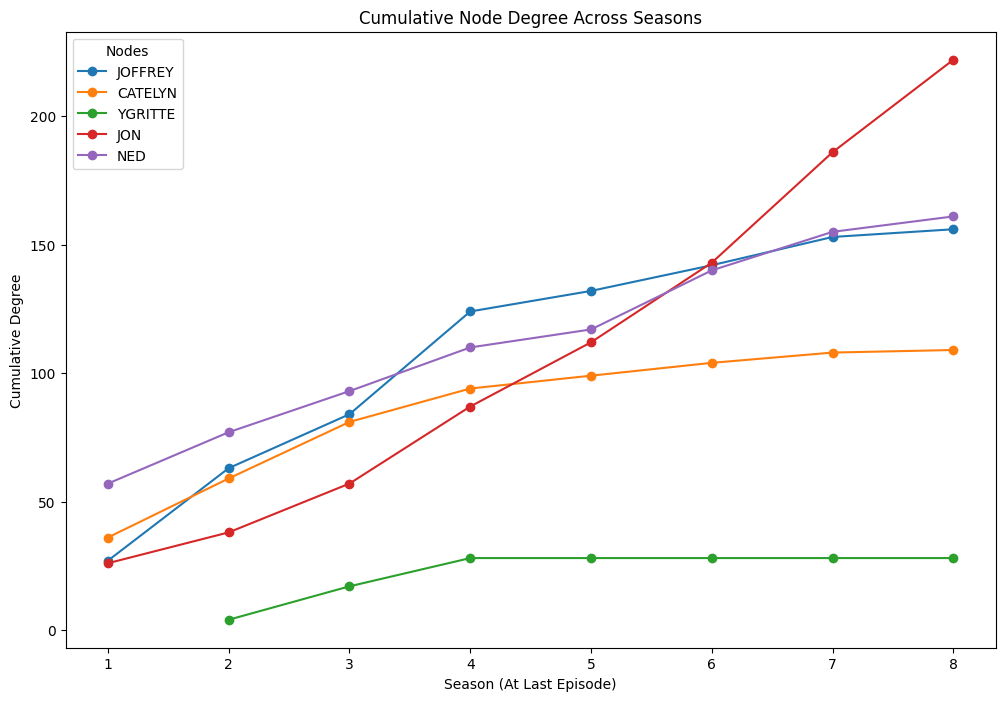

In [6]:
edges_s1, edges_s2, edges_s3, edges_s4, edges_s5, edges_s6, edges_s7, edges_s8 = edges_df
nodes_s1, nodes_s2, nodes_s3, nodes_s4, nodes_s5, nodes_s6, nodes_s7, nodes_s8 = nodes_df

def prepare_nodes(nodes_df):
    nodes_df = nodes_df.drop_duplicates(subset='Id')
    return nodes_df.set_index('Id').to_dict('index')

def create_graph(edges, nodes):
    Gtmp = nx.from_pandas_edgelist(edges, 'Source', 'Target', ['Weight'])
    nodes_dict = prepare_nodes(nodes)
    Gtmp.add_nodes_from(nodes_dict.items())
    return Gtmp

G1 = create_graph(edges_s1, nodes_s1)
G2 = create_graph(edges_s2, nodes_s2)
G3 = create_graph(edges_s3, nodes_s3)
G4 = create_graph(edges_s4, nodes_s4)
G5 = create_graph(edges_s5, nodes_s5)
G6 = create_graph(edges_s6, nodes_s6)
G7 = create_graph(edges_s7, nodes_s7)
G8 = create_graph(edges_s8, nodes_s8)

# List of graphs for easier access
graphs = [G1, G2, G3, G4, G5, G6, G7, G8]

# Step 1: Get the node of interest from the user
nodes_of_interest = ['JOFFREY', 'CATELYN', 'YGRITTE', 'JON', 'NED']

# Prepare to plot
plt.figure(figsize=(12, 8))

# Step 2: Calculate and plot the cumulative degrees for each node of interest
for node_of_interest in nodes_of_interest:
    # Initialize degrees for each season
    degrees = []
    start_season = None

    for season_idx, G_temp in enumerate(graphs):
        # Check if node_of_interest is in the graph
        if node_of_interest in G_temp.nodes:
            if start_season is None:
                start_season = season_idx  # Record the first season the node appears
            degrees.append(G_temp.degree(node_of_interest))  # Degree is the number of edges
        else:
            degrees.append(0)  # No connections for this node in the current season

    # Compute the cumulative sum of degrees from the start season
    cumulative_degrees = pd.Series(degrees[start_season:]).cumsum()

    # Plot the cumulative sum of degrees for each node
    plt.plot(range(start_season + 1, len(degrees) + 1), cumulative_degrees, marker='o', linestyle='-', label=node_of_interest)

# Add plot labels and legend
plt.title('Cumulative Node Degree Across Seasons')
plt.xlabel('Season (At Last Episode)')
plt.ylabel('Cumulative Degree')
plt.xticks(range(1, 9))
plt.legend(title='Nodes')
plt.grid(False)  # Remove the grid from the plot
plt.show()

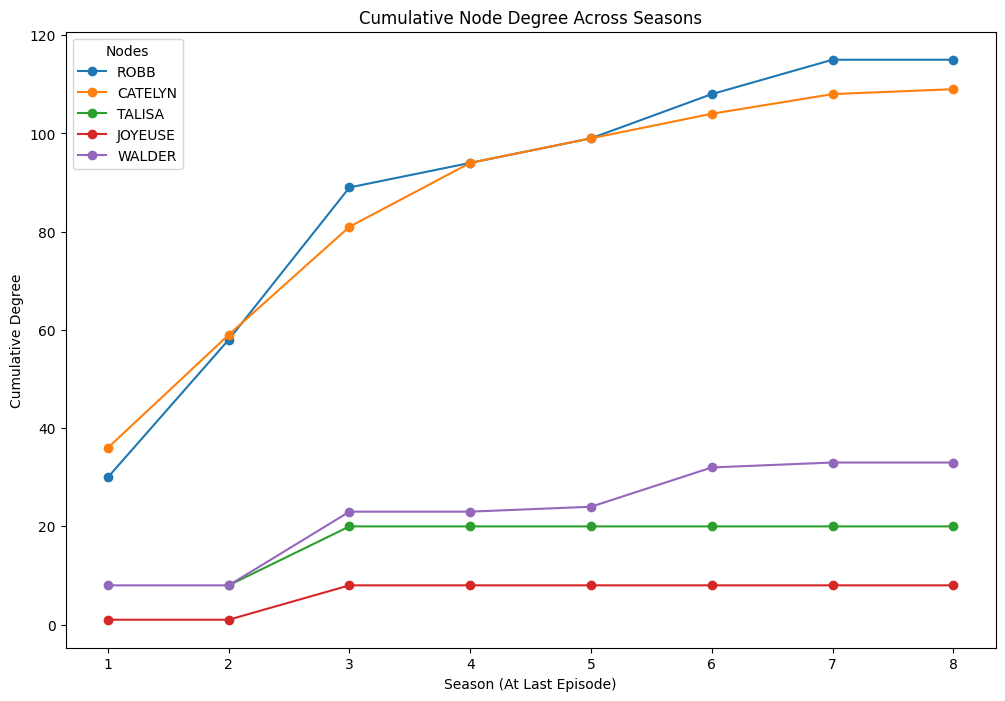

In [7]:
edges_s1, edges_s2, edges_s3, edges_s4, edges_s5, edges_s6, edges_s7, edges_s8 = edges_df
nodes_s1, nodes_s2, nodes_s3, nodes_s4, nodes_s5, nodes_s6, nodes_s7, nodes_s8 = nodes_df

def prepare_nodes(nodes_df):
    nodes_df = nodes_df.drop_duplicates(subset='Id')
    return nodes_df.set_index('Id').to_dict('index')

def create_graph(edges, nodes):
    Gtmp = nx.from_pandas_edgelist(edges, 'Source', 'Target', ['Weight'])
    nodes_dict = prepare_nodes(nodes)
    Gtmp.add_nodes_from(nodes_dict.items())
    return Gtmp

G1 = create_graph(edges_s1, nodes_s1)
G2 = create_graph(edges_s2, nodes_s2)
G3 = create_graph(edges_s3, nodes_s3)
G4 = create_graph(edges_s4, nodes_s4)
G5 = create_graph(edges_s5, nodes_s5)
G6 = create_graph(edges_s6, nodes_s6)
G7 = create_graph(edges_s7, nodes_s7)
G8 = create_graph(edges_s8, nodes_s8)

# List of graphs for easier access
graphs = [G1, G2, G3, G4, G5, G6, G7, G8]

# Step 1: Get the node of interest from the user
nodes_of_interest = ['ROBB', 'CATELYN', 'TALISA', 'JOYEUSE', 'WALDER']

# Prepare to plot
# Prepare to plot
plt.figure(figsize=(12, 8))

# Step 2: Calculate and plot the cumulative degrees for each node of interest
for node_of_interest in nodes_of_interest:
    # Initialize degrees for each season
    degrees = []
    start_season = None

    for season_idx, G_temp in enumerate(graphs):
        # Check if node_of_interest is in the graph
        if node_of_interest in G_temp.nodes:
            if start_season is None:
                start_season = season_idx  # Record the first season the node appears
            degrees.append(G_temp.degree(node_of_interest))  # Degree is the number of edges
        else:
            degrees.append(0)  # No connections for this node in the current season

    # Compute the cumulative sum of degrees from the start season
    cumulative_degrees = pd.Series(degrees[start_season:]).cumsum()

    # Plot the cumulative sum of degrees for each node
    plt.plot(range(start_season + 1, len(degrees) + 1), cumulative_degrees, marker='o', linestyle='-', label=node_of_interest)

# Add plot labels and legend
plt.title('Cumulative Node Degree Across Seasons')
plt.xlabel('Season (At Last Episode)')
plt.ylabel('Cumulative Degree')
plt.xticks(range(1, 9))
plt.legend(title='Nodes')
plt.grid(False)  # Remove the grid from the plot
plt.show()

In [8]:
g = ig.Graph.from_networkx(G)

# Generate the spring layout using NetworkX
spring_layout = nx.spring_layout(G)

# Prepare colors for the nodes
node_colors = ["LightGreen" for _ in range(len(G.nodes()))]

# Apply PageRank
pagerank_scores = g.pagerank(weights='Weight')
pagerank_scores = np.array(pagerank_scores)
pagerank_scores_log = np.log1p(pagerank_scores)

# Set the node sizes based on PageRank
min_size = 10  # Minimum node size
max_size = 70  # Maximum node size
size_range = max_size - min_size
node_sizes = min_size + size_range * (pagerank_scores_log - np.min(pagerank_scores_log)) / (np.max(pagerank_scores_log) - np.min(pagerank_scores_log))

# Add positions to igraph nodes
positions = spring_layout
g.vs["x"] = [positions[node][0] for node in G.nodes()]
g.vs["y"] = [positions[node][1] for node in G.nodes()]
g.vs["pagerank"] = pagerank_scores

# Plot the graph with igraph
fig, ax = plt.subplots(figsize=(45, 30))
ax.set_xlim(min(g.vs["x"])-0.05, max(g.vs["x"])+0.05)
ax.set_ylim(min(g.vs["y"])-0.05, max(g.vs["y"])+0.05)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('auto')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

ig.plot(
    g,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in positions.values()],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=g.vs["Label"] if "Label" in g.vs.attributes() else None,
    vertex_label_size=20,
    edge_color="grey",
    edge_width=0.5
)

plt.show()



Output hidden; open in https://colab.research.google.com to view.

Let's list the various characters

In [9]:
for nm in g.vs():
  print(nm['Label'])

Ned
Robert
Daenerys
Jorah
Jon
Sam
Petyr
Varys
Drogo
Arya
Catelyn
Robb
Bronn
Tyrion
Cersei
Shae
Joffrey
Sansa
Pycelle
Viserys
Septa Mordane
Tywin
Jeor
Theon
Bran
Luwin
Jaime
Loras
Renly
Mirri Maz Dur
Syrio
Jory
Pyp
Ros
Grenn
Walder
Doreah
Benjen
Irri
Greatjon
Mord
Lysa
Rakharo
Robin
Osha
Rodrik
Qotho
Aemon
Barristan
Illyrio
Shagga
Yoren
Allister
Wine Merchant
Sandor
Lancel
Rickon
Marillion
Kevan
Vardis
Rhaego
Janos
Gendry
Hot Pie
Lommy
Meryn
Jon Arryn
Hodor
Stannis
Mago
Mycah
Tobho Mott
Rast
Old Nan
Mhaegen
Aerys
Baelor
Dareon
Stable Boy
Hugh of the Vale
Othell
Othor
Gregor
Tomard
Gared
Royce
Jonos
Masha
Rickard Stark
Ilyn
Will
Lyanna
Ryger
Stevron
Waymar
Addam
Leo
Rhaegar
Assassin
Balon
Beric
Brandon
Hoster
Cohollo
Jhiqui
Myrcella
Aegon
Borcas
Bowen
Luke
Irogenia
Galbart
Rickard Karstark
High Septon
Tysha
Jaremy
Joanna
Tommen
Little Bird
Joyeuse
Mac
Melessa
Roose
Steffon
Varly
Randyll
Jaqen
Davos
Ygritte
Talisa
Yara
Xaro
Quorin
Spice King
Matthos
Melisandre
Brienne
Dagmer
Alton
Podrick

### Size

In [10]:
nodes = g.vs()
edges = g.es()

print("Number of possible edges (N*(N-1)):", int(len(nodes)*(len(nodes)-1)/2))
print("Number of nodes (Graph Order):", len(nodes))
print("Number of edges (Graph Size):", len(edges))

# Graph Density: how connected are the nodes. Calculated by: n_edges/n_possible_edges
print("Graph Density:", g.density())

Number of possible edges (N*(N-1)): 81003
Number of nodes (Graph Order): 403
Number of edges (Graph Size): 2634
Graph Density: 0.032517314173549125


### Distribution

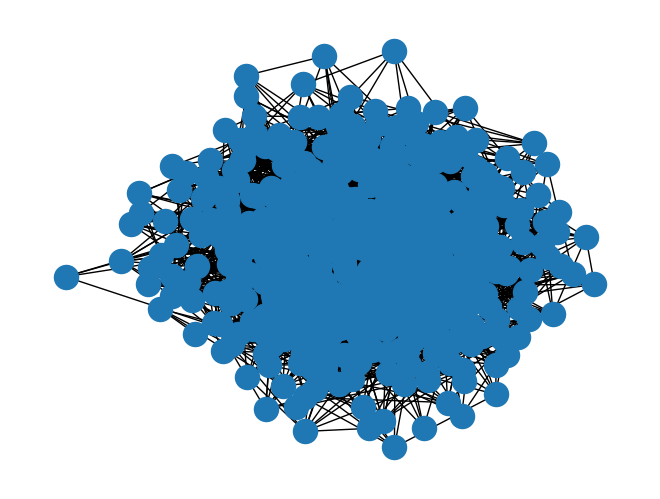

In [11]:
#Generate an appropriate ensemble of null-model networks, such as Erdős–Rényi random graphs, or Maslov–Sneppen random graphs.
rand_net = nx.erdos_renyi_graph(len(G.nodes()), len(G.edges())/(len(G.nodes())*(len(G.nodes()) - 1)/2), seed=None, directed=False)
nx.draw(rand_net)

In [12]:
#Calculate the average of the mean shortest path length Lr over this ensemble of null-model networks; calculate Cr analogously.
print("number of nodes in random net:", len(rand_net.nodes()), "number of edges in random net", len(rand_net.edges()))
print("average shortest path for the random network", nx.average_shortest_path_length(rand_net))
print("clustering coefficient for the random network", nx.average_clustering(rand_net))

number of nodes in random net: 403 number of edges in random net 2699
average shortest path for the random network 2.5974099724701554
clustering coefficient for the random network 0.03093224258480328


In [13]:
if nx.is_connected(G):
    avg_shortest_path = nx.average_shortest_path_length(G)
else:
    # Extract the largest connected component
    largest_cc = max(nx.connected_components(G), key=len)
    subgraph = G.subgraph(largest_cc)
    avg_shortest_path = nx.average_shortest_path_length(subgraph)


# Calculate the normalised shortest path λ:=L/Lr. and γ:=C/Cr
print("normalised average shortest path for the original network", avg_shortest_path / nx.average_shortest_path_length(rand_net))
print("normalised clustering coefficient for the original network", nx.average_clustering(G) / nx.average_clustering(rand_net))


normalised average shortest path for the original network 1.0329613399366915
normalised clustering coefficient for the original network 21.291958044359365


The idea is that:
- Small-world networks should have some spatial structure, which is reflected by a high clustering coefficient.
By contrast, random networks have no such structure and a low clustering coefficient.
- Small-world networks are efficient in communicating and similar and thus have a small shortest path length,
comparable to that of random networks. By contrast, purely spatial networks have a high shortest path length.

In [14]:
# Calculate the normalised shortest path λ:=L/Lr. and γ:=C/Cr
lambda_val = avg_shortest_path / nx.average_shortest_path_length(rand_net)
gamma_val = nx.average_clustering(G) / nx.average_clustering(rand_net)

# Check small-world criteria
if lambda_val >= 1 and gamma_val > 1:
    print("This network is a small-world network")
    print(f"Lambda value: {lambda_val}, Gamma value: {gamma_val}")
else:
    print("This network is not a small-world network")
    print(f"Lambda value: {lambda_val}, Gamma value: {gamma_val}")


This network is a small-world network
Lambda value: 1.0329613399366915, Gamma value: 21.291958044359365


In [15]:
# Using nx.sigma() and nx.omega() to further validate that the graph is indeed of small-world type

#sigma = nx.sigma(G, niter=5, nrand=10, seed=None)
#if sigma > 1:
#  print("Small-world: The value of sigma is", sigma) # yes
#
#
#omega = nx.omega(G, niter=5, nrand=10, seed=None)
#
#if omega < 0.3 and omega > -0.3:
#  print("Small-world: The value of omega is",  omega) # yes

### Connectedness

In [16]:
if(g.is_connected()):
  print("Graph is connected")
else:
  print("Graph is not connected")

Graph is connected


### Diameter

The diameter is the highest distance in the network

In [17]:
print("Graph Diameter:", g.diameter(directed=False))

Graph Diameter: 6


In [18]:
# AVERAGE SHORTEST PATH LENGTH - HOW CLOSE ARE THE NODES TO EACH OTHER ON AVERAGE

if nx.is_connected(G):
    avg_shortest_path = nx.average_shortest_path_length(G)
else:
    # Extract the largest connected component
    largest_cc = max(nx.connected_components(G), key=len)
    subgraph = G.subgraph(largest_cc)
    avg_shortest_path = nx.average_shortest_path_length(subgraph)

print("Average shortest path length:", avg_shortest_path)

Average shortest path length: 2.6830240855276966


### Node Degrees

In [19]:
# CONNECTIVITY - HOW WELL CONNECTED A NODE IS

def sum_neigh_degree(graph): # compute the sum of neighbors' degrees
    data = {}
    for node in graph.vs:
        neighbors = graph.neighbors(node, mode="all")
        neighbors_degrees = [graph.degree(neigh) for neigh in neighbors]
        data[node.index] = sum(neighbors_degrees) / len(neighbors_degrees) if neighbors_degrees else 0
    return data


print("Node degrees:"),

# Compute the average degree of each node’s neighbors
sum_neigh_degree = sum_neigh_degree(g)

# Prepare data for DataFrame
degree = [v.degree() for v in g.vs]
average_neigh_degree = [sum_neigh_degree[v.index] for v in g.vs]

degree_df = pd.DataFrame({
    'Node': g.vs["Label"],
    'Degree': degree,
    "Average degree of node's neighbours": average_neigh_degree
})

degree_df = degree_df.sort_values(by=['Degree'], ascending=False)

# Print results
print("First 10 nodes with highest degree")
print(degree_df.head(10))
print("\n")
print("Last 5 nodes with lowest degree")
print(degree_df.tail(5))



Node degrees:
First 10 nodes with highest degree
         Node  Degree  Average degree of node's neighbours
13     Tyrion     128                            27.601562
4         Jon     105                            30.028571
17      Sansa     101                            33.049505
9        Arya      97                            29.412371
2    Daenerys      93                            28.365591
26      Jaime      90                            34.500000
14     Cersei      86                            32.639535
5         Sam      78                            32.474359
127     Davos      78                            36.089744
0         Ned      78                            31.987179


Last 5 nodes with lowest degree
               Node  Degree  Average degree of node's neighbours
331        Rhaenyra       1                                  7.0
185          Harren       1                                 58.0
369  Arthur (child)       1                                 33.0
187     

In [20]:
dmax = max(degree_df['Degree'])
print(f'maximum degree: {dmax}')
dmin = min(degree_df['Degree'])
print(f'minimum degree: {dmin}')
davg = np.mean(degree_df['Degree'])
print(f'average degree: {davg}')
dmostfreq = list(dict(degree_df['Degree'].value_counts()).items())[0]
print(f'most frequent degree (mode): {dmostfreq[0]} with {dmostfreq[1]} nodes')

maximum degree: 128
minimum degree: 1
average degree: 13.071960297766749
most frequent degree (mode): 2 with 53 nodes


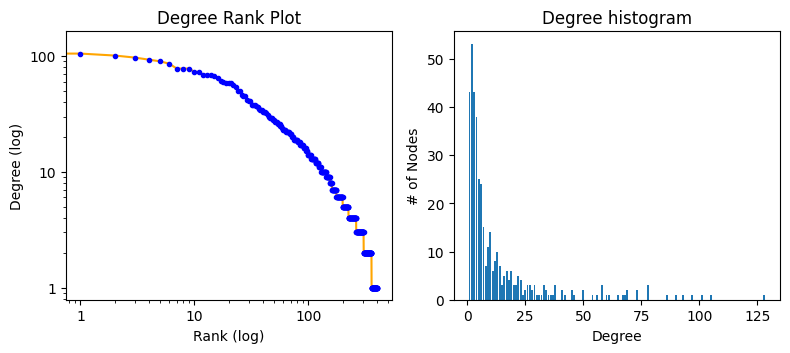

In [21]:
from matplotlib.ticker import ScalarFormatter


fig = plt.figure("Degree ", figsize=(8, 8))

axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[3:, :2])
# Plot the line in orange
ax0.plot(sorted(degree_df['Degree'], reverse=True), "orange")
# Plot the dots in blue
ax0.plot(sorted(degree_df['Degree'], reverse=True), "bo", markersize=3)
ax0.set_title("Degree Rank Plot")
ax0.set_ylabel("Degree (log)")
ax0.set_xlabel("Rank (log)")
ax0.set_xscale('log')
ax0.set_yscale('log')

ax0.xaxis.set_major_formatter(ScalarFormatter())
ax0.yaxis.set_major_formatter(ScalarFormatter())

ax1 = fig.add_subplot(axgrid[3:, 2:])
unique, counts = np.unique(degree_df['Degree'], return_counts=True)
ax1.bar(unique, counts)
ax1.set_title("Degree histogram")
ax1.set_xlabel("Degree")
ax1.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()


### Bridges

An edge is a bridge if its removal increases the number of (weakly) connected components in the graph.

In [22]:
bridges = g.bridges()

if bridges:
    print("The network has bridges.")
    bridge_labels = [(g.vs[g.es[bridge].source]["Label"], g.vs[g.es[bridge].target]["Label"]) for bridge in bridges]
    print("The bridges are:", bridge_labels)
else:
    print("The network doesn't have any bridges")

print("Number of bridges:", len(bridges))

The network has bridges.
The bridges are: [('Ned', 'Varly'), ('Jorah', 'Little Bird'), ('Jon', 'Brian'), ('Sam', 'Magnar'), ('Varys', 'Martha'), ('Drogo', 'Cohollo'), ('Arya', 'Stable Boy'), ('Arya', 'Ternesio Terys'), ('Arya', 'Owen'), ('Robb', 'Quent'), ('Robb', 'Frey Daughter'), ('Robb', 'Rennick'), ('Bronn', 'Falyse'), ('Tyrion', 'Protester'), ('Tyrion', 'Orson'), ('Tyrion', 'Strumpet'), ('Tywin', 'Harren'), ('Theon', "Captain's Daughter"), ('Theon', 'Drowned Priest'), ('Theon', 'Torturer'), ('Luwin', 'Portan'), ('Renly', 'Gerard'), ('Walder', 'Ryger'), ('Walder', 'Merry'), ('Doreah', 'Irogenia'), ('Allister', 'Denys'), ('Sandor', 'Gatins'), ('Rickon', 'Billy'), ('Dareon', 'Hobb'), ('Aegon', 'Rhaenyra'), ('Davos', 'Father Seaworth'), ('Davos', 'Marya'), ('Salladhor', 'Lhara'), ('Ramsay', 'Cerwyn'), ('Missandei', 'Zala'), ('Qyburn', 'Arthur (child)'), ('Shireen', 'Bert'), ('Olenna', 'Musician'), ('Brynden', 'Minisa'), ('Desmond', 'Eldrick'), ('Goatherd', "Goatherd's Son"), ('Lollys'

### Centrality

In [23]:
# Degree Centrality
degree_cen = nx.degree_centrality(G)

# Weighted degree centrality
weighted_degree_cen = {node: sum(weight for _, _, weight in G.edges(node, data='Weight')) for node in G.nodes()}
# Normalize the weighted degree centrality
max_weighted_degree = max(weighted_degree_cen.values())
weighted_degree_cen = {node: centrality / max_weighted_degree for node, centrality in weighted_degree_cen.items()}

clo_cen = nx.closeness_centrality(G)
bet_cen = nx.betweenness_centrality(G)
eig_cen = nx.eigenvector_centrality(G)
har_cen = nx.harmonic_centrality(G)
pagerank_cen = nx.pagerank(G)

centrality_df = pd.DataFrame(data={
    'Node': list(bet_cen.keys()),
    'Betweenness centrality': list(bet_cen.values()),
    'Closeness centrality': list(clo_cen.values()),
    'Eigenvector centrality': list(eig_cen.values()),
    'Harmonic centrality': [1/x for x in har_cen.values()],
    'Degree centrality': list(degree_cen.values()),
    'Weighted degree centrality': list(weighted_degree_cen.values()),
    'PageRank centrality': list(pagerank_cen.values())
})

centrality_df



Node  Betweenness centrality  Closeness centrality  \
0              NED                0.045493              0.520725   
1           ROBERT                0.014982              0.508861   
2         DAENERYS                0.113915              0.536000   
3            JORAH                0.056665              0.508217   
4              JON                0.096989              0.553719   
..             ...                     ...                   ...   
398          SARRA                0.000000              0.374302   
399  IRONBORN_LORD                0.000000              0.436009   
400         ALANNA                0.000000              0.260700   
401   CERSEIS_BABY                0.000000              0.382857   
402        WILLIAM                0.000000              0.257033   

     Eigenvector centrality  Harmonic centrality  Degree centrality  \
0                  0.146644             0.005482           0.194030   
1                  0.134787             0.006767           0.134328   
2                  0.154682             0.006590           0.231343   
3                  0.123568             0.005851           0.166667   
4                  0.182204             0.004249           0.261194   
..                      ...                  ...                ...   
398                0.012770             0.006094           0.009950   
399                0.054695             0.006126           0.042289   
400                0.000118             0.004965           0.002488   
401                0.014907             0.007239           0.007463   
402                0.000156             0.006431           0.002488   

     Weighted degree centrality  PageRank centrality  
0                      0.268555             0.012904  
1                      0.108782             0.008476  
2                      0.925779             0.017975  
3                      0.364306             0.012816  
4                      0.839660             0.017533  
..                          ...                  ...  
398                    0.005099             0.001010  
399                    0.020397             0.002723  
400                    0.001133             0.000941  
401                    0.003399             0.000796  
402                    0.001133             0.000661  

[403 rows x 8 columns]

In [24]:
print("Mean values of Centralities:")
print("Betweenness:", np.mean(list(bet_cen.values())))
print("Closeness:", np.mean(list(clo_cen.values())))
print("Eigenvector:", np.mean(list(eig_cen.values())))
print("Harmonic:", 1/np.mean(list(har_cen.values())))
print("Degree:", np.mean(list(degree_cen.values())))
print("Weighted Degree:", np.mean(list(weighted_degree_cen.values())))
print("PageRank:", np.mean(list(pagerank_cen.values())))

Mean values of Centralities:
Betweenness: 0.004197067544956849
Closeness: 0.3804827493518117
Eigenvector: 0.029537465052548596
Harmonic: 0.006139854613930614
Degree: 0.032517314173549125
Weighted Degree: 0.056977765905847785
PageRank: 0.0024813895781637717


In [25]:
def highest_centrality(centrality_dict):
    # Sort items by centrality score in descending order and return the top one
    cent_items = sorted(centrality_dict.items(), key=lambda item: item[1], reverse=True)
    return cent_items[0]

def k_highest_centrality(centrality_dict, k):
    # Sort items by centrality score in descending order and return the top k
    cent_items = sorted(centrality_dict.items(), key=lambda item: item[1], reverse=True)
    return cent_items[:k]

In [26]:
highest_centrality_clo_cen = k_highest_centrality(clo_cen, 5)
clo_cen_char, clo_cen_scores = zip(*highest_centrality_clo_cen)

highest_centrality_bet_cen = k_highest_centrality(bet_cen, 5)
bet_cen_char, bet_cen_scores = zip(*highest_centrality_bet_cen)

highest_centrality_eig_cen = k_highest_centrality(eig_cen, 5)
eig_cen_char, eig_cen_scores = zip(*highest_centrality_eig_cen)

highest_centrality_har_cen = k_highest_centrality(har_cen, 5)
har_cen_char, har_cen_scores = zip(*highest_centrality_har_cen)

highest_centrality_degree_cen = k_highest_centrality(degree_cen, 5)
degree_cen_char, degree_cen_scores = zip(*highest_centrality_degree_cen)

highest_centrality_weighted_degree_cen = k_highest_centrality(weighted_degree_cen, 5)
weighted_degree_cen_char, weighted_degree_cen_scores = zip(*highest_centrality_weighted_degree_cen)

highest_centrality_pagerank_cen = k_highest_centrality(pagerank_cen, 5)
pagerank_cen_char, pagerank_cen_scores = zip(*highest_centrality_pagerank_cen)

# Update the DataFrame to display the top 5 most central nodes for each measure correctly
centrality_df = pd.DataFrame(data={
    'Most central character - Betweenness': bet_cen_char,
    'Score - Betweenness': bet_cen_scores,
    'Most central character - Closeness': clo_cen_char,
    'Score - Closeness': clo_cen_scores,
    'Most central character - Eigenvector': eig_cen_char,
    'Score - Eigenvector': eig_cen_scores,
    'Most central character - Harmonic': har_cen_char,
    'Score - Harmonic': [1/x for x in har_cen_scores],
    'Most central character - Degree': degree_cen_char,
    'Score - Degree': degree_cen_scores,
    'Most central character - Weighted Degree': weighted_degree_cen_char,
    'Score - Weighted Degree': weighted_degree_cen_scores,
    'Most central character - PageRank': pagerank_cen_char,
    'Score - PageRank': pagerank_cen_scores
})


centrality_df

Most central character - Betweenness  Score - Betweenness  \
0                               TYRION             0.133898   
1                             DAENERYS             0.113915   
2                                 ARYA             0.103360   
3                                  JON             0.096989   
4                                THEON             0.065733   

  Most central character - Closeness  Score - Closeness  \
0                             TYRION           0.579251   
1                                JON           0.553719   
2                              SANSA           0.552957   
3                              JAIME           0.543243   
4                               ARYA           0.541779   

  Most central character - Eigenvector  Score - Eigenvector  \
0                               TYRION             0.216356   
1                                SANSA             0.204286   
2                                JAIME             0.185107   
3                                  JON             0.182204   
4                                 ARYA             0.172839   

  Most central character - Harmonic  Score - Harmonic  \
0                            TYRION          0.003817   
1                               JON          0.004016   
2                             SANSA          0.004040   
3                              ARYA          0.004103   
4                             JAIME          0.004138   

  Most central character - Degree  Score - Degree  \
0                          TYRION        0.318408   
1                             JON        0.261194   
2                           SANSA        0.251244   
3                            ARYA        0.241294   
4                        DAENERYS        0.231343   

  Most central character - Weighted Degree  Score - Weighted Degree  \
0                                   TYRION                 1.000000   
1                                 DAENERYS                 0.925779   
2                                      JON                 0.839660   
3                                     ARYA                 0.705382   
4                                    JAIME                 0.675921   

  Most central character - PageRank  Score - PageRank  
0                            TYRION          0.022293  
1                              ARYA          0.018192  
2                          DAENERYS          0.017975  
3                               JON          0.017533  
4                             SANSA          0.015933

Index(['Most central character - Betweenness', 'Score - Betweenness',
       'Most central character - Closeness', 'Score - Closeness',
       'Most central character - Eigenvector', 'Score - Eigenvector',
       'Most central character - Harmonic', 'Score - Harmonic',
       'Most central character - Degree', 'Score - Degree',
       'Most central character - Weighted Degree', 'Score - Weighted Degree',
       'Most central character - PageRank', 'Score - PageRank'],
      dtype='object')


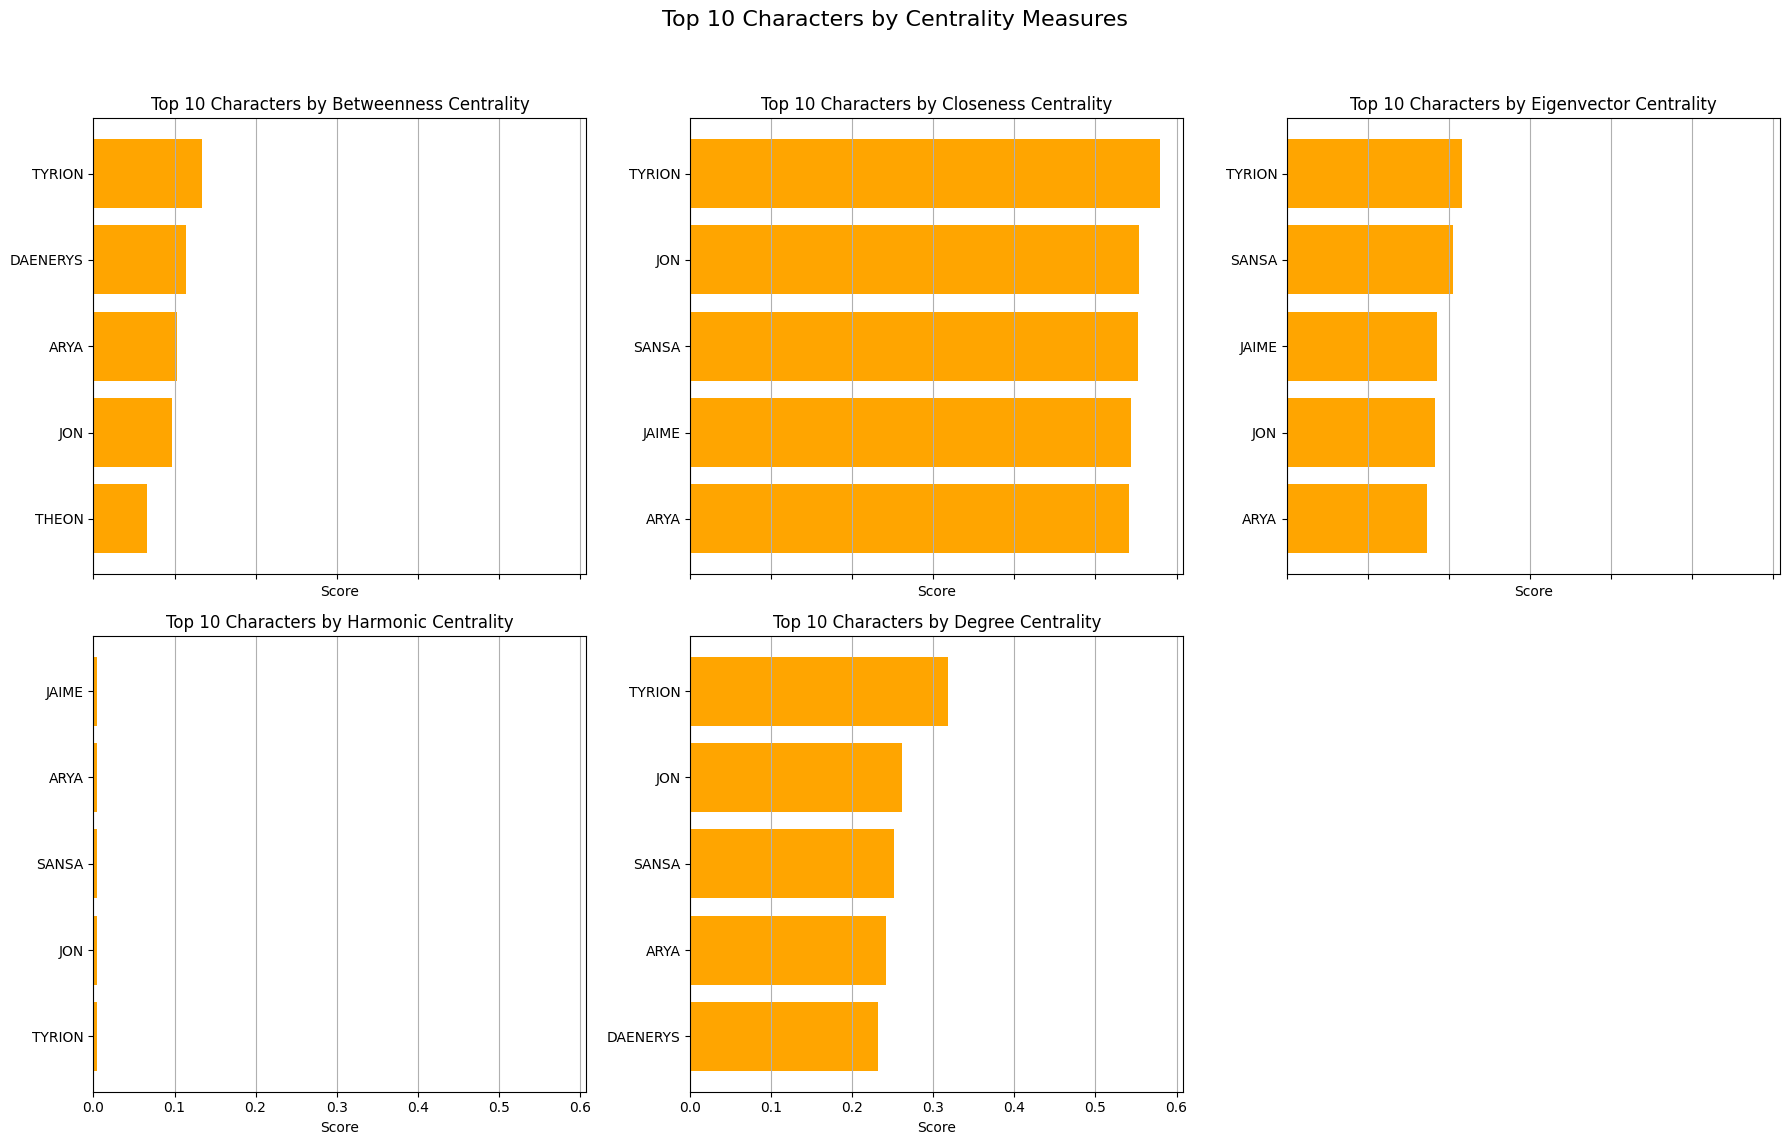

In [27]:
print(centrality_df.columns)
# Define the centrality measures
centrality_measures = ['Betweenness', 'Closeness', 'Eigenvector', 'Harmonic', 'Degree']

def plot_top_10_bar_chart(df, centrality_measure, ax):
    """Plots a bar chart for the top 10 characters of a specific centrality measure, sorted from highest to lowest score."""
    # Extract the top 10 characters and their scores for the given centrality measure
    chars = df[f'Most central character - {centrality_measure}']
    scores = df[f'Score - {centrality_measure}']

    # Create a DataFrame for sorting
    data = pd.DataFrame({
        'Character': chars,
        'Score': scores
    })

    # Sort by Score in descending order and take top 10
    data_sorted = data.sort_values(by='Score', ascending=True).head(10)

    # Plotting
    ax.barh(data_sorted['Character'], data_sorted['Score'], color='Orange')
    ax.set_xlabel('Score')
    ax.set_title(f'Top 10 Characters by {centrality_measure} Centrality')
    ax.grid(axis='x')
    ax.set_yticks(data_sorted['Character'])  # Ensure y-ticks are set to character names
    ax.set_yticklabels(data_sorted['Character'])  # Set y-tick labels to character names

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 12), sharex=True)
fig.suptitle('Top 10 Characters by Centrality Measures', fontsize=16)

# Plot each centrality measure
for idx, measure in enumerate(centrality_measures):
    ax = axs[idx // 3, idx % 3]
    plot_top_10_bar_chart(centrality_df, measure, ax)

# Remove empty subplot (since we have only 5 measures)
fig.delaxes(axs[1, 2])

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

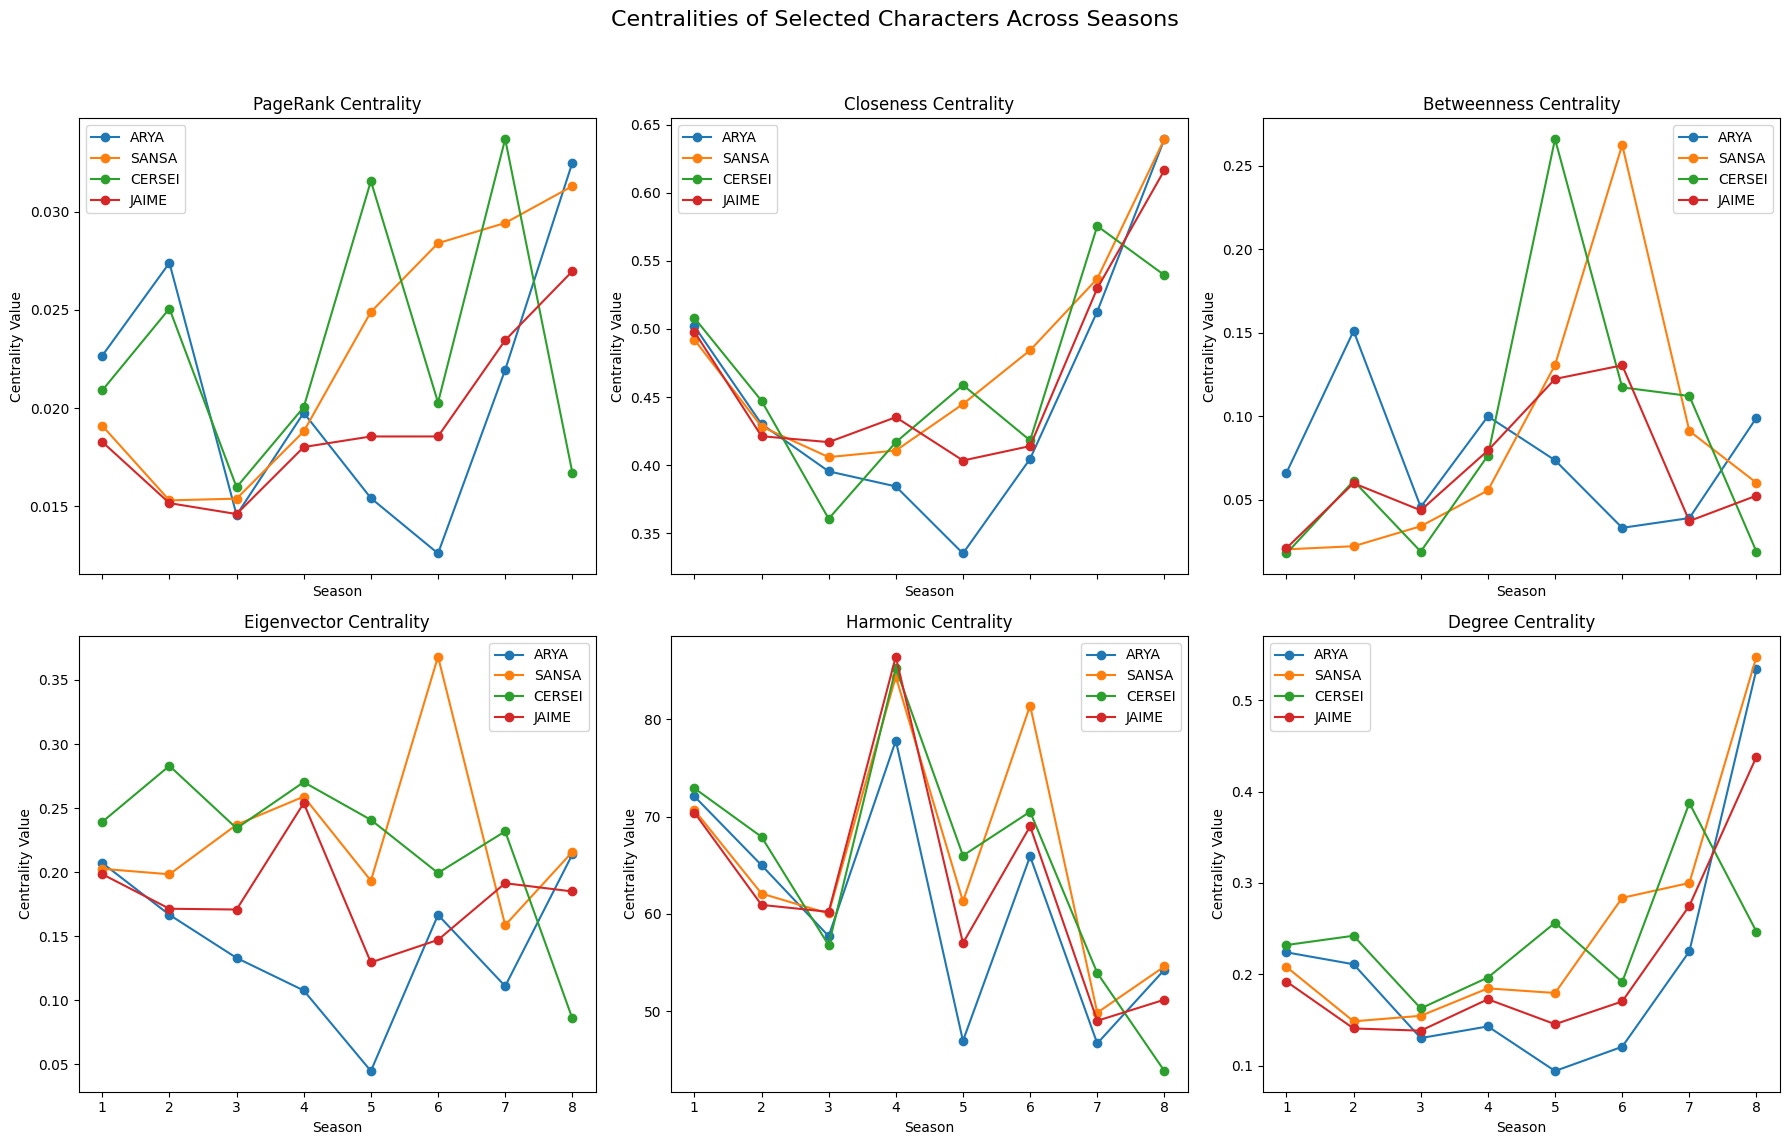

In [28]:
top_characters = ['ARYA', 'SANSA', 'CERSEI', 'JAIME']
#top_characters = ['CERSEI', 'SANSA']
#top_characters = ['ARYA', 'JAIME']

# Initialize dictionaries to hold centrality values across seasons for each character
centralities_over_seasons = {char: { 'PageRank': [], 'Closeness': [], 'Betweenness': [], 'Eigenvector': [], 'Harmonic': [], 'Degree': [] } for char in top_characters}

# Compute and collect centrality values for each character across all seasons
for i, G_tmp in enumerate(graphs):
    # Calculate centralities for the current season
    os_pr_cen = nx.pagerank(G_tmp)
    os_clo_cen = nx.closeness_centrality(G_tmp)
    os_bet_cen = nx.betweenness_centrality(G_tmp)
    os_eig_cen = nx.eigenvector_centrality(G_tmp)
    os_har_cen = nx.harmonic_centrality(G_tmp)
    os_degree_cen = nx.degree_centrality(G_tmp)

    # For each top character, extract centrality values if the character is present in the current graph
    for char in top_characters:
        centralities_over_seasons[char]['PageRank'].append(os_pr_cen.get(char, 0))
        centralities_over_seasons[char]['Closeness'].append(os_clo_cen.get(char, 0))
        centralities_over_seasons[char]['Betweenness'].append(os_bet_cen.get(char, 0))
        centralities_over_seasons[char]['Eigenvector'].append(os_eig_cen.get(char, 0))
        centralities_over_seasons[char]['Harmonic'].append(os_har_cen.get(char, 0))
        centralities_over_seasons[char]['Degree'].append(os_degree_cen.get(char, 0))

# Create subplots for each centrality measure
fig, axs = plt.subplots(2, 3, figsize=(18, 12), sharex=True)
fig.suptitle('Centralities of Selected Characters Across Seasons', fontsize=16)

# Define centrality types and plot them
centrality_types = ['PageRank', 'Closeness', 'Betweenness', 'Eigenvector', 'Harmonic', 'Degree']
for idx, centrality_type in enumerate(centrality_types):
    ax = axs[idx // 3, idx % 3]
    for char in top_characters:
        ax.plot(range(1, 9), centralities_over_seasons[char][centrality_type], marker='o', linestyle='-', label=char)
    ax.set_title(f'{centrality_type} Centrality')
    ax.set_xlabel('Season')
    ax.set_ylabel('Centrality Value')
    ax.legend(loc='best')

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Homophily

In [29]:
#Compute degree assortativity of graph.
#Assortativity measures the similarity of connections in the graph with respect to the node degree.
#This is the same as degree_assortativity_coefficient but uses the potentially faster scipy.stats.pearsonr function.
assortativity_coefficient = nx.degree_assortativity_coefficient(G, weight="Weight")
print("Degree assortativity coefficient:",nx.degree_pearson_correlation_coefficient(G,weight="Weight"))

Degree assortativity coefficient: -0.14754952688263528


Degree assortativity coefficient for G1: -0.14114137624962075
Degree assortativity coefficient for G2: -0.0866058060620649
Degree assortativity coefficient for G3: -0.05620076344223796
Degree assortativity coefficient for G4: -0.08227470375131585
Degree assortativity coefficient for G5: -0.1985276338060207
Degree assortativity coefficient for G6: -0.0748419902030152
Degree assortativity coefficient for G7: -0.14455182129551525
Degree assortativity coefficient for G8: -0.14882012486362964


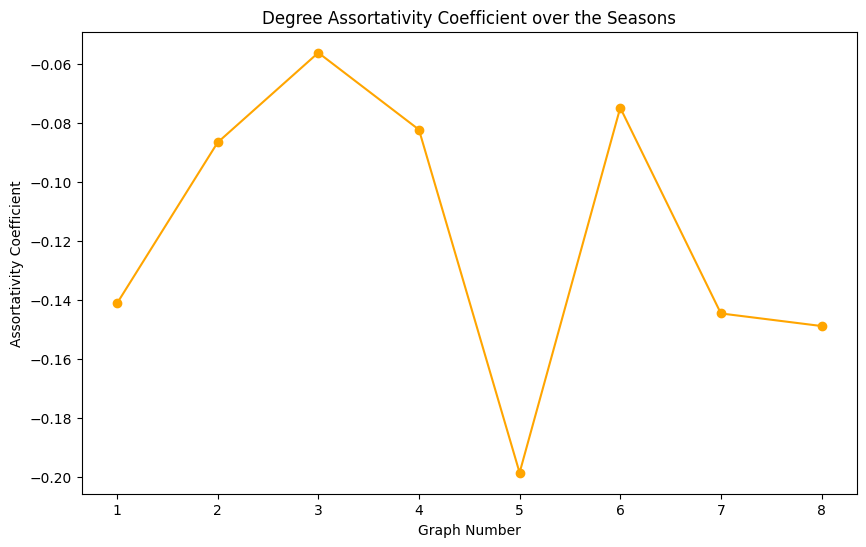

In [30]:
graphs = [G1, G2, G3, G4, G5, G6, G7, G8]
assortativity_coefficients = []

# Calculate degree assortativity coefficient for each graph
for i, G_tmp in enumerate(graphs, start=1):
    coeff = nx.degree_assortativity_coefficient(G_tmp, weight="Weight")
    assortativity_coefficients.append(coeff)
    print(f"Degree assortativity coefficient for G{i}: {coeff}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 9), assortativity_coefficients, marker='o', linestyle='-', color='Orange')
plt.title('Degree Assortativity Coefficient over the Seasons')
plt.xlabel('Graph Number')
plt.ylabel('Assortativity Coefficient')
plt.xticks(range(1, 9))  # Label x-axis with G1 to G8
plt.grid(False)
plt.show()

In [31]:
#jaccard similarity between all couples of nodes
preds = nx.jaccard_coefficient(G, G.edges())

first_node = []
sec_node = []
score = []

for u, v, p in preds:
  first_node.append(u)
  sec_node.append(v)
  score.append(p)

jaccard_coefficient = pd.DataFrame(data = list(zip(first_node, sec_node, score)),
                             columns = ['First node', 'Second node', 'Score'])

jaccard_coefficient = jaccard_coefficient.sort_values("Score", ascending=False)
jaccard_coefficient

First node      Second node     Score
2633        VALE_LORD    IRONBORN_LORD  0.888889
2632  RIVERLANDS_LORD        VALE_LORD  0.888889
2631  RIVERLANDS_LORD    IRONBORN_LORD  0.888889
2630   DORNISH_PRINCE        VALE_LORD  0.888889
2629   DORNISH_PRINCE  RIVERLANDS_LORD  0.888889
...               ...              ...       ...
1963            AEGON         RHAENYRA  0.000000
2287           RAMSAY           CERWYN  0.000000
1292            THEON   DROWNED_PRIEST  0.000000
1739           RICKON            BILLY  0.000000
2338           QYBURN     ARTHUR_CHILD  0.000000

[2634 rows x 3 columns]

### Triangles

In [32]:
#list of all traingles
triangles_list = [(n,nbr,nbr2) for n in G for nbr, nbr2 in itertools.combinations(G[n],2) if nbr in G[nbr2]]
print("List of all the edges involved in the traingles")
triangles_list[:30]

List of all the edges involved in the traingles


[('NED', 'ROBERT', 'LITTLEFINGER'),
 ('NED', 'ROBERT', 'VARYS'),
 ('NED', 'ROBERT', 'ARYA'),
 ('NED', 'ROBERT', 'CERSEI'),
 ('NED', 'ROBERT', 'CATELYN'),
 ('NED', 'ROBERT', 'PYCELLE'),
 ('NED', 'ROBERT', 'JAIME'),
 ('NED', 'ROBERT', 'SANSA'),
 ('NED', 'ROBERT', 'JORY_CASSEL'),
 ('NED', 'ROBERT', 'JOFFREY'),
 ('NED', 'ROBERT', 'RENLY'),
 ('NED', 'ROBERT', 'BRAN'),
 ('NED', 'ROBERT', 'JON'),
 ('NED', 'ROBERT', 'BARRISTAN'),
 ('NED', 'ROBERT', 'ROBB'),
 ('NED', 'ROBERT', 'BENJEN'),
 ('NED', 'ROBERT', 'THEON'),
 ('NED', 'ROBERT', 'GENDRY'),
 ('NED', 'ROBERT', 'JON_ARRYN'),
 ('NED', 'ROBERT', 'TYRION'),
 ('NED', 'ROBERT', 'TYWIN'),
 ('NED', 'ROBERT', 'HOUND'),
 ('NED', 'ROBERT', 'STANNIS'),
 ('NED', 'ROBERT', 'AERYS'),
 ('NED', 'ROBERT', 'MAESTER_LUWIN'),
 ('NED', 'ROBERT', 'MOUNTAIN'),
 ('NED', 'ROBERT', 'LANCEL'),
 ('NED', 'ROBERT', 'LORAS'),
 ('NED', 'ROBERT', 'LYANNA'),
 ('NED', 'ROBERT', 'BERIC')]

In [33]:
#number of triangles per character, sorted by value in descendent order

triangles_frequency = pd.DataFrame(data = list(zip(nx.triangles(G).keys(), nx.triangles(G).values())),
                             columns = ['Character', '# of triangles in which they are involved'])

triangles_frequency = triangles_frequency.sort_values("# of triangles in which they are involved", ascending=False)
triangles_frequency.head(10)

Character  # of triangles in which they are involved
13     TYRION                                       1217
17      SANSA                                       1121
4         JON                                       1002
26      JAIME                                        957
9        ARYA                                        836
14     CERSEI                                        835
127     DAVOS                                        803
7       VARYS                                        791
24       BRAN                                        756
136   BRIENNE                                        728

In [34]:
#total number of triangles
print("There are", int(np.sum(list(nx.triangles(G).values())) / 3), "triangles")

There are 11329 triangles


Investigating interesting character triangles

Triangle ('JON', 'ARYA', 'NIGHT_KING') has strength 92, the highest edge strength is 70, and the strongest edge is ('JON', 'ARYA')
Triangle ('DAENERYS', 'JON', 'TYRION') has strength 432, the highest edge strength is 194, and the strongest edge is ('DAENERYS', 'JON')
Triangle ('DAENERYS', 'JON', 'SANSA') has strength 335, the highest edge strength is 194, and the strongest edge is ('DAENERYS', 'JON')
Triangle ('DAENERYS', 'JON', 'CERSEI') has strength 233, the highest edge strength is 194, and the strongest edge is ('DAENERYS', 'JON')


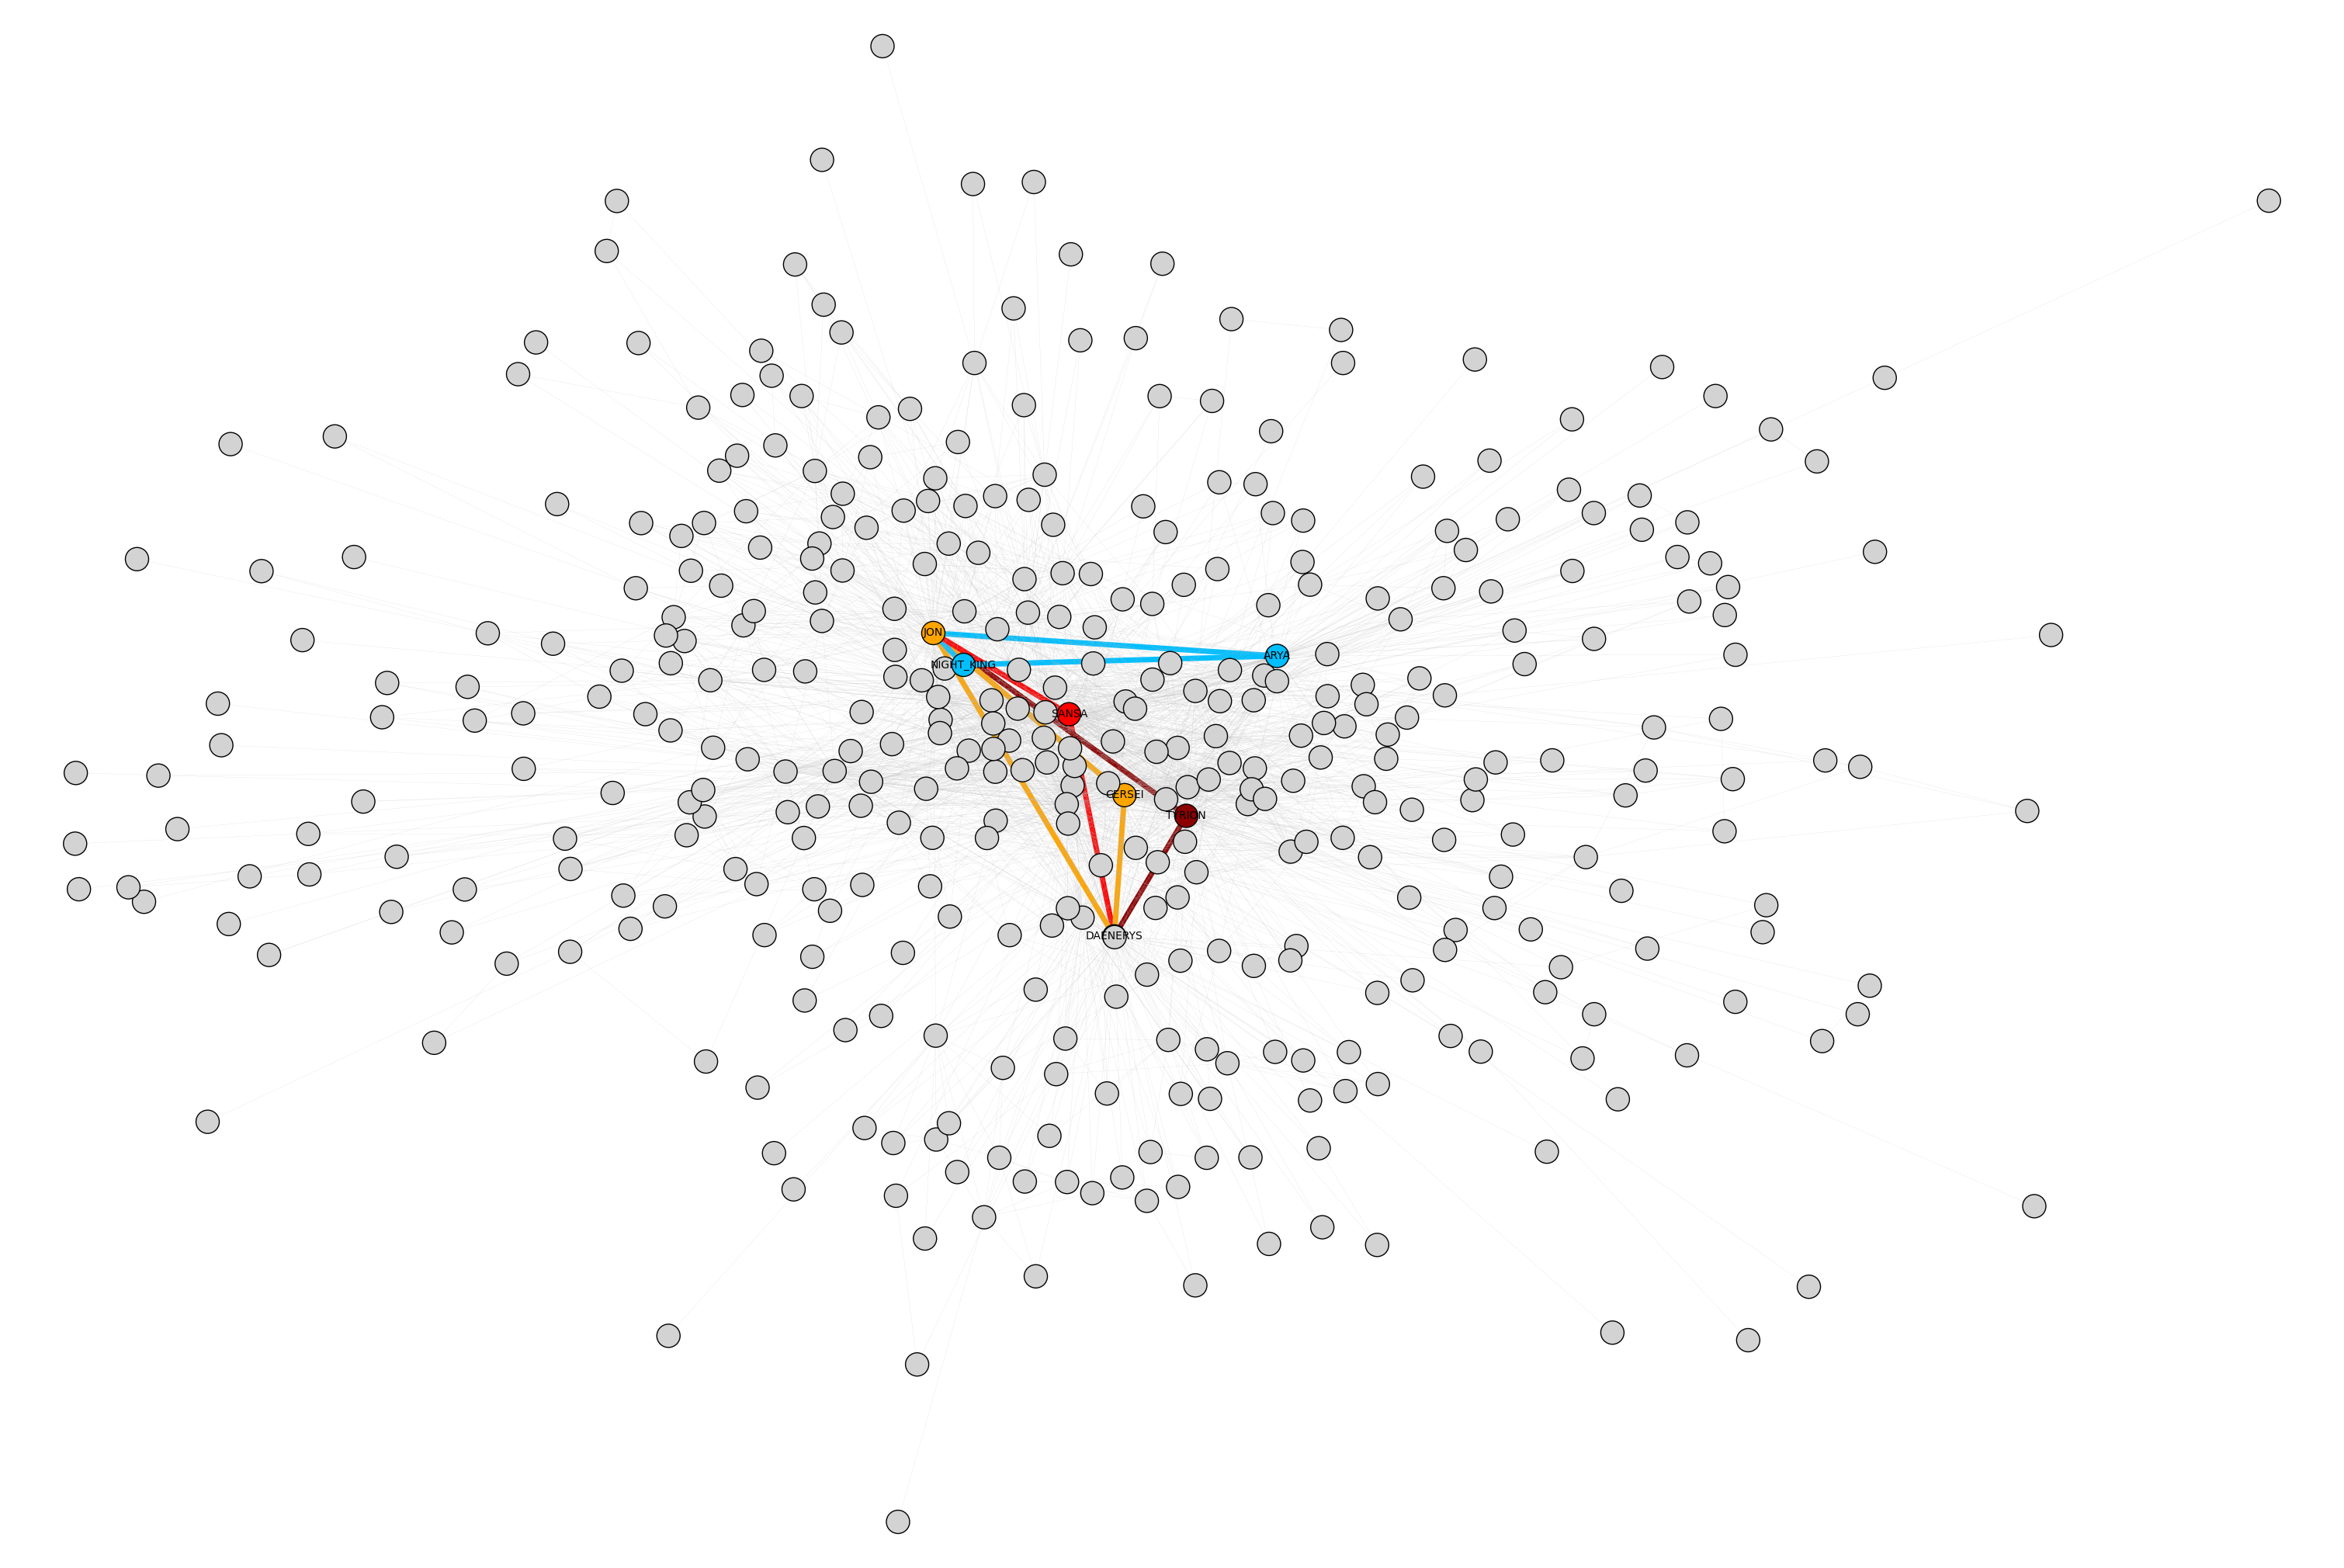

In [35]:
import networkx as nx
import matplotlib.pyplot as plt
import igraph as ig

# Define the highlighted triangles with colors
highlighted_triangles = [
    (('JON', 'ARYA', 'NIGHT_KING'), "DeepSkyBlue"),
    (('DAENERYS', 'JON', 'TYRION'), "DarkRed"),
    (('DAENERYS', 'JON', 'SANSA'), "Red"),
    (('DAENERYS', 'JON', 'CERSEI'), "Orange")

]

# Compute positions using spring layout
community_graph_layout_gn = nx.spring_layout(G)

# Define default color for nodes and edges
default_node_color = "lightgrey"
default_edge_color = "grey"

# Initialize node colors and sizes
node_colors = [default_node_color] * len(G.nodes())
node_sizes = [30] * len(G.nodes())

# Initialize edge colors and widths
edge_colors = [default_edge_color] * len(G.edges())
edge_widths = [0.1] * len(G.edges())

# Convert edges to sets for efficient lookup
edges_set = set(map(frozenset, G.edges()))

# Function to compute the strength of a triangle and the maximum edge weight
def compute_triangle_strength_and_max_edge(triangle, graph):
    nodes = list(triangle)
    strength = 0
    max_edge_weight = 0
    max_edge = None
    for i in range(3):
        for j in range(i + 1, 3):
            edge = (nodes[i], nodes[j]) if (nodes[i], nodes[j]) in graph.edges() else (nodes[j], nodes[i])
            if edge in graph.edges():
                edge_weight = graph[edge[0]][edge[1]]['Weight']
                strength += edge_weight
                if edge_weight > max_edge_weight:
                    max_edge_weight = edge_weight
                    max_edge = edge
    return strength, max_edge_weight, max_edge

# Highlight the nodes and edges in the triangles and compute strengths and max edge weights
triangle_strengths_and_max_edges = []
highlighted_nodes = set()  # To keep track of nodes part of triangles

for idx, (triangle, color) in enumerate(highlighted_triangles):
    strength, max_edge_weight, max_edge = compute_triangle_strength_and_max_edge(triangle, G)
    triangle_strengths_and_max_edges.append((triangle, strength, max_edge_weight, max_edge))

    for node in triangle:
        if node in G.nodes():
            highlighted_nodes.add(node)  # Add node to highlighted set
            node_index = list(G.nodes()).index(node)
            node_colors[node_index] = color  # Node color based on triangle color
            node_sizes[node_index] = 30  # Larger size for highlighted nodes

    for i in range(3):
        for j in range(i + 1, 3):
            edge = (triangle[i], triangle[j]) if (triangle[i], triangle[j]) in G.edges() else (triangle[j], triangle[i])
            if edge in G.edges():
                edge_index = list(G.edges()).index(edge)
                edge_colors[edge_index] = color  # Edge color based on triangle color
                edge_widths[edge_index] = 5  # Thicker edge for edges in triangles

# Print the strengths of the triangles, the highest edge weights, and the names of the edges
for triangle, strength, max_edge_weight, max_edge in triangle_strengths_and_max_edges:
    print(f"Triangle {triangle} has strength {strength}, the highest edge strength is {max_edge_weight}, and the strongest edge is {max_edge}")

# Prepare labels: Only label nodes that are part of highlighted triangles
vertex_labels = {}
for node in G.nodes():
    if node in highlighted_nodes:
        vertex_labels[node] = node
    else:
        vertex_labels[node] = ""  # Hide labels of non-highlighted nodes

# Add positions to igraph nodes
positions = community_graph_layout_gn
g.vs["x"] = [positions[node][0] for node in G.nodes()]
g.vs["y"] = [positions[node][1] for node in G.nodes()]

# Plot the graph with igraph
fig, ax = plt.subplots(figsize=(30, 20))
ax.set_xlim(min(g.vs["x"]) - 0.05, max(g.vs["x"]) + 0.05)
ax.set_ylim(min(g.vs["y"]) - 0.05, max(g.vs["y"]) + 0.05)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('auto')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

# Plot the graph with igraph
ig.plot(
    g,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in positions.values()],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=[vertex_labels[node] for node in G.nodes()],
    vertex_label_size=10,
    edge_color=edge_colors,
    edge_width=edge_widths
)

plt.show()


Specifically about a character

In [36]:
highlight_node = "TYRION"  # replace this with the actual node identifier

def find_triangles_with_node(G, node):
    triangles = []
    for n in G:
        neighbors = list(G.neighbors(n))
        for nbr, nbr2 in itertools.combinations(neighbors, 2):
            if G.has_edge(nbr, nbr2) and node in (n, nbr, nbr2):
                triangles.append((n, nbr, nbr2))
    return triangles

# Compute positions using spring layout
community_graph_layout_gn = nx.spring_layout(G)

# Prepare colors for nodes and edges
node_colors = []
edge_colors = []
for node in G.nodes():
    if node == highlight_node:
        node_colors.append("green")  # Highlight TYRION node
    else:
        node_colors.append("lightgrey")

# Initialize edge colors and widths
edge_colors = ["grey"] * len(G.edges())
edge_widths = [0.1] * len(G.edges())

# Find triangles involving TYRION
highlighted_triangles = find_triangles_with_node(G, highlight_node)

# Highlight edges in triangles involving TYRION
for triangle in highlighted_triangles:
    triangle_edges = [
        (triangle[0], triangle[1]),
        (triangle[1], triangle[2]),
        (triangle[2], triangle[0])
    ]
    for edge in triangle_edges:
        try:
            if edge in G.edges():
                edge_index = list(G.edges()).index(edge)
            elif (edge[1], edge[0]) in G.edges():
                edge_index = list(G.edges()).index((edge[1], edge[0]))
            else:
                continue  # Skip if edge not found in G.edges()

            edge_colors[edge_index] = "red"  # Color edges in triangles with red
            edge_widths[edge_index] = 1  # Thicker width for edges in triangles
        except ValueError:
            pass  # Ignore ValueError if edge not found in G.edges()

# Add positions to igraph nodes
g = ig.Graph(directed=False)
g.add_vertices(list(G.nodes()))
g.add_edges(list(G.edges()))
g.vs["x"] = [community_graph_layout_gn[node][0] for node in G.nodes()]
g.vs["y"] = [community_graph_layout_gn[node][1] for node in G.nodes()]
g.vs["Label"] = list(G.nodes())

node_sizes = [20] * len(G.nodes())

# Plot the graph with igraph
fig, ax = plt.subplots(figsize=(45, 35))
ax.set_xlim(min(g.vs["x"]) - 0.1, max(g.vs["x"]) + 0.1)
ax.set_ylim(min(g.vs["y"]) - 0.1, max(g.vs["y"]) + 0.1)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('auto')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

# Plot the graph with igraph
ig.plot(
    g,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in zip(g.vs["x"], g.vs["y"])],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=g.vs["Label"],
    vertex_label_size=10,
    edge_color=edge_colors,
    edge_width=edge_widths
)

plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [37]:
highlight_node = "NIGHT_KING"

def find_triangles_with_node(G, node):
    triangles = []
    for n in G:
        neighbors = list(G.neighbors(n))
        for nbr, nbr2 in itertools.combinations(neighbors, 2):
            if G.has_edge(nbr, nbr2) and node in (n, nbr, nbr2):
                triangles.append((n, nbr, nbr2))
    return triangles

# Compute positions using spring layout
community_graph_layout_gn = nx.spring_layout(G)

# Prepare colors for nodes and edges
node_colors = []
edge_colors = []
for node in G.nodes():
    if node == highlight_node:
        node_colors.append("green")
    else:
        node_colors.append("lightgrey")

# Initialize edge colors and widths
edge_colors = ["grey"] * len(G.edges())
edge_widths = [0.1] * len(G.edges())


highlighted_triangles = find_triangles_with_node(G, highlight_node)


for triangle in highlighted_triangles:
    triangle_edges = [
        (triangle[0], triangle[1]),
        (triangle[1], triangle[2]),
        (triangle[2], triangle[0])
    ]
    for edge in triangle_edges:
        try:
            if edge in G.edges():
                edge_index = list(G.edges()).index(edge)
            elif (edge[1], edge[0]) in G.edges():
                edge_index = list(G.edges()).index((edge[1], edge[0]))
            else:
                continue  # Skip if edge not found in G.edges()

            edge_colors[edge_index] = "red"  # Color edges in triangles with red
            edge_widths[edge_index] = 3  # Thicker width for edges in triangles
        except ValueError:
            pass  # Ignore ValueError if edge not found in G.edges()

# Add positions to igraph nodes
g = ig.Graph(directed=False)
g.add_vertices(list(G.nodes()))
g.add_edges(list(G.edges()))
g.vs["x"] = [community_graph_layout_gn[node][0] for node in G.nodes()]
g.vs["y"] = [community_graph_layout_gn[node][1] for node in G.nodes()]
g.vs["Label"] = list(G.nodes())

node_sizes = [20] * len(G.nodes())

# Plot the graph with igraph
fig, ax = plt.subplots(figsize=(45, 20))
ax.set_xlim(min(g.vs["x"]) - 0.1, max(g.vs["x"]) + 0.1)
ax.set_ylim(min(g.vs["y"]) - 0.1, max(g.vs["y"]) + 0.1)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('auto')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

# Plot the graph with igraph
ig.plot(
    g,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in zip(g.vs["x"], g.vs["y"])],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=g.vs["Label"],
    vertex_label_size=10,
    edge_color=edge_colors,
    edge_width=edge_widths
)

plt.show()

Output hidden; open in https://colab.research.google.com to view.

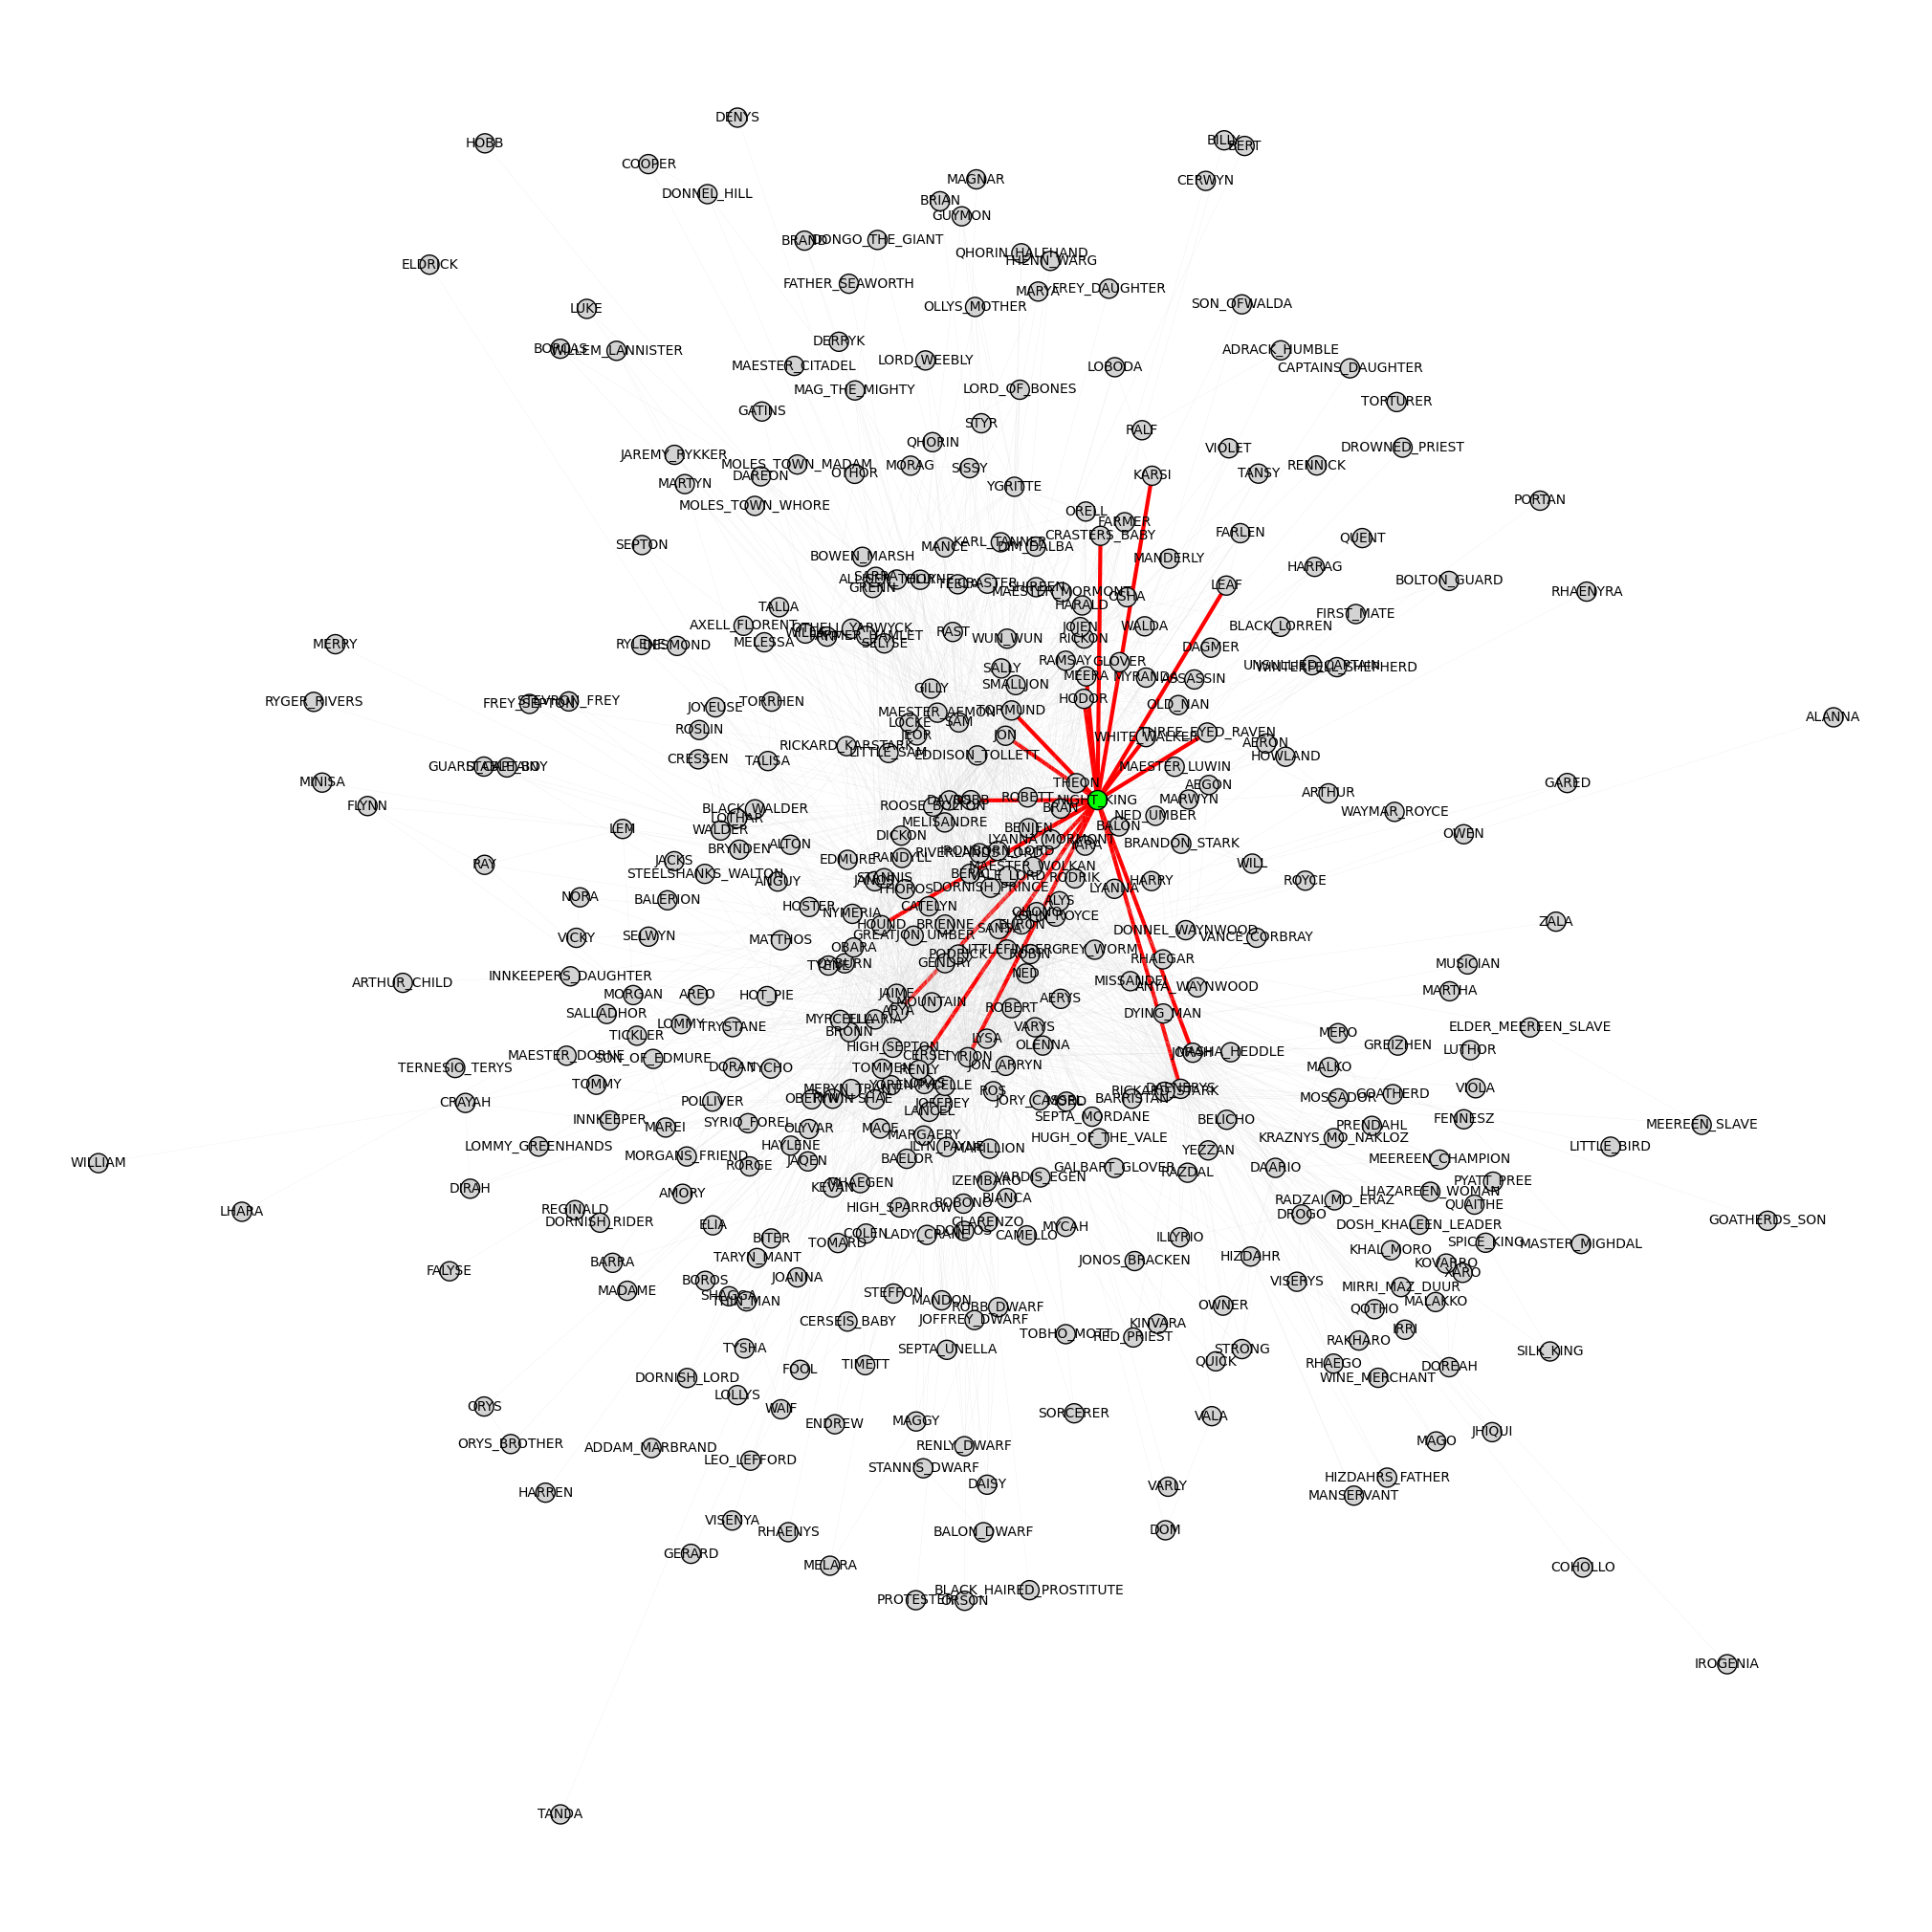

In [38]:
highlight_node = "NIGHT_KING"

# Compute positions using spring layout
community_graph_layout_gn = nx.spring_layout(G)

# Prepare colors for nodes and edges
node_colors = []
edge_colors = []
edge_widths = []

for node in G.nodes():
    if node == highlight_node:
        node_colors.append("green")
    else:
        node_colors.append("lightgrey")

# Set default colors and widths for edges
for edge in G.edges():
    if highlight_node in edge:
        edge_colors.append("red")  # Highlight edges connected to the highlight_node
        edge_widths.append(3)  # Thicker width for these edges
    else:
        edge_colors.append("lightgrey")  # Default color for other edges
        edge_widths.append(0.1)  # Thinner width for other edges

# Add positions to igraph nodes
g = ig.Graph(directed=False)
g.add_vertices(list(G.nodes()))
g.add_edges(list(G.edges()))
g.vs["x"] = [community_graph_layout_gn[node][0] for node in G.nodes()]
g.vs["y"] = [community_graph_layout_gn[node][1] for node in G.nodes()]
g.vs["Label"] = list(G.nodes())

node_sizes = [20] * len(G.nodes())

# Plot the graph with igraph
fig, ax = plt.subplots(figsize=(20, 20))
ax.set_xlim(min(g.vs["x"]) - 0.1, max(g.vs["x"]) + 0.1)
ax.set_ylim(min(g.vs["y"]) - 0.1, max(g.vs["y"]) + 0.1)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('auto')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

# Plot the graph with igraph
ig.plot(
    g,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in zip(g.vs["x"], g.vs["y"])],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=g.vs["Label"],
    vertex_label_size=10,
    edge_color=edge_colors,
    edge_width=edge_widths
)

plt.show()

### Clustering Coefficients

GENERAL INDICATION OF THE GRAPH'S TENDENCY TO BE ORGANISED INTO CLUSTERS

If a node has fewer than 2 neighbors, the clustering coefficient is undefined, and the returned value is NaN

In [39]:
# Global Clustering Coefficient (Triadic Closure) - NUMBER OF CLOSED TRIPLETS/NUMBER OF POSSIBLE TRIPLETS

print("Global clustering coefficient (Triadic Closure)", g.transitivity_undirected())

Global clustering coefficient (Triadic Closure) 0.32429724623575884


Global Clustering Coefficient (Triadic Closure) for G1: 0.38325183374083127
Global Clustering Coefficient (Triadic Closure) for G2: 0.41570438799076215
Global Clustering Coefficient (Triadic Closure) for G3: 0.4810656836461126
Global Clustering Coefficient (Triadic Closure) for G4: 0.4353452848201973
Global Clustering Coefficient (Triadic Closure) for G5: 0.40765268579838115
Global Clustering Coefficient (Triadic Closure) for G6: 0.46384039900249374
Global Clustering Coefficient (Triadic Closure) for G7: 0.4669358206877349
Global Clustering Coefficient (Triadic Closure) for G8: 0.6441837028505615


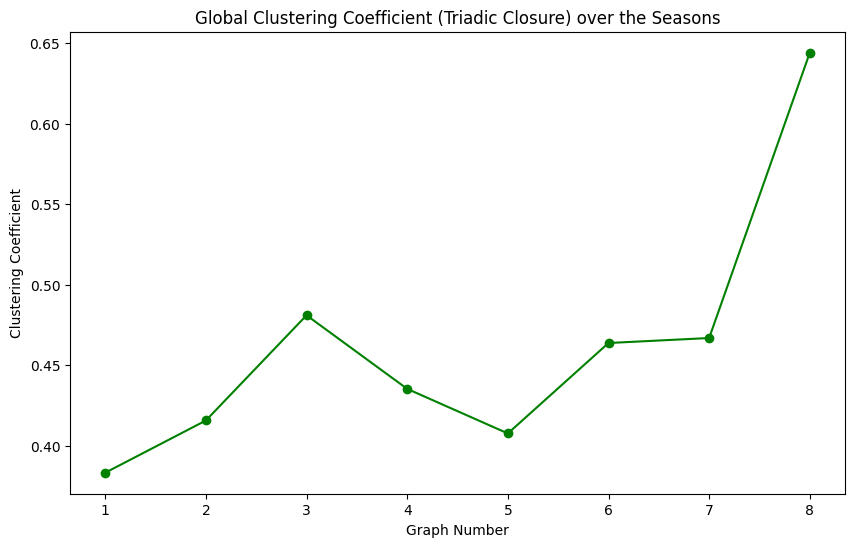

In [40]:
graphs = [G1, G2, G3, G4, G5, G6, G7, G8]
clustering_coefficients = []

# Calculate Global Clustering Coefficient (Triadic Closure) for each graph
for i, G_temp in enumerate(graphs, start=1):
    # Calculate the global clustering coefficient using NetworkX's transitivity function
    coeff = nx.transitivity(G_temp)
    clustering_coefficients.append(coeff)
    print(f"Global Clustering Coefficient (Triadic Closure) for G{i}: {coeff}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 9), clustering_coefficients, marker='o', linestyle='-', color='g')
plt.title('Global Clustering Coefficient (Triadic Closure) over the Seasons')
plt.xlabel('Graph Number')
plt.ylabel('Clustering Coefficient')
plt.xticks(range(1, 9))  # Label x-axis with G1 to G8
plt.grid(False)
plt.show()


In [41]:
# Local Clustering Coefficient - ARE THE NEIGHBOURS OF THE NODES ALSO CONNECTED?
print("Local clustering components:")
local_ccs = g.transitivity_local_undirected()
sum_cc = 0
for local_cc in local_ccs:
    if not math.isnan(local_cc):
        sum_cc += local_cc

for node in nodes:
        print("   Local clustering coefficient of node", node["Label"],":",local_ccs[node.index])

Local clustering components:
   Local clustering coefficient of node Ned : 0.20812520812520813
   Local clustering coefficient of node Robert : 0.36617749825296997
   Local clustering coefficient of node Daenerys : 0.16713417484805984
   Local clustering coefficient of node Jorah : 0.22388059701492535
   Local clustering coefficient of node Jon : 0.1835164835164835
   Local clustering coefficient of node Sam : 0.23876123876123875
   Local clustering coefficient of node Petyr : 0.312568306010929
   Local clustering coefficient of node Varys : 0.3371696504688832
   Local clustering coefficient of node Drogo : 0.325
   Local clustering coefficient of node Arya : 0.179553264604811
   Local clustering coefficient of node Catelyn : 0.30129870129870134
   Local clustering coefficient of node Robb : 0.26255293405928615
   Local clustering coefficient of node Bronn : 0.23557692307692307
   Local clustering coefficient of node Tyrion : 0.14972933070866143
   Local clustering coefficient of node 

In [42]:
# Average Clustering Coefficient of the graph:

print("Average clustering component", sum_cc/len(g.vs()))
print(nx.average_clustering(G))


Average clustering component 0.6586080113335775
0.6586080113335775


Average Clustering Coefficient for G1: 0.6296612631071081
Average Clustering Coefficient for G2: 0.5767762682048713
Average Clustering Coefficient for G3: 0.5966873081130292
Average Clustering Coefficient for G4: 0.6665100417033084
Average Clustering Coefficient for G5: 0.5800247618317703
Average Clustering Coefficient for G6: 0.6905709455363381
Average Clustering Coefficient for G7: 0.5962780829107537
Average Clustering Coefficient for G8: 0.6746808391591189


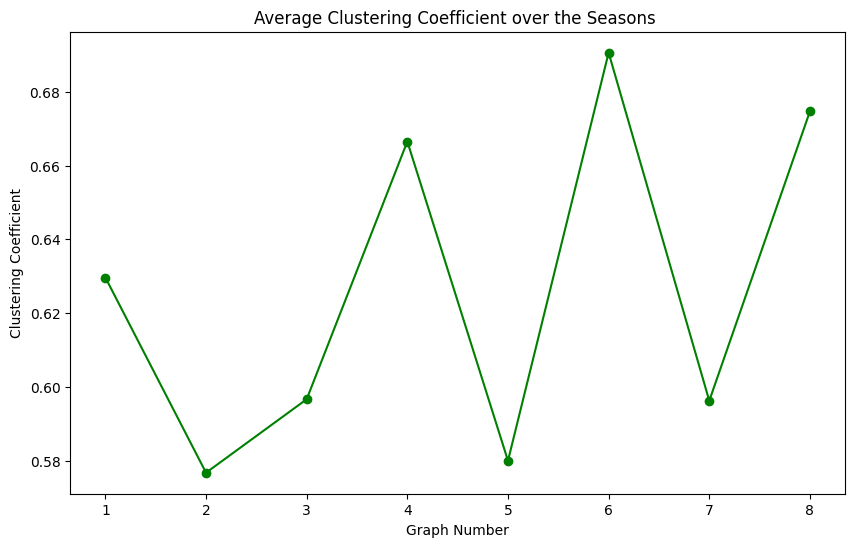

In [43]:
graphs = [G1, G2, G3, G4, G5, G6, G7, G8]
avg_clustering_coefficients = []

# Calculate Global Clustering Coefficient for each graph
for i, G_temp in enumerate(graphs, start=1):
    coeff = nx.average_clustering(G_temp)
    avg_clustering_coefficients.append(coeff)
    print(f"Average Clustering Coefficient for G{i}: {coeff}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 9), avg_clustering_coefficients, marker='o', linestyle='-', color='g')
plt.title('Average Clustering Coefficient over the Seasons ')
plt.xlabel('Graph Number')
plt.ylabel('Clustering Coefficient')
plt.xticks(range(1, 9))  # Label x-axis with G1 to G8
plt.show()


## Communities

In [44]:
# Checking Strength of Connections between characters for quick and handy insights.

def get_edge_strength(G, node1, node2):
    # Check if the edge exists
    if G.has_edge(node1, node2) or G.has_edge(node2, node1):
        # Get the weight of the edge
        edge_weight = G[node1][node2]['Weight']
        # Get the degrees of the nodes
        degree_node1 = G.degree(node1)
        degree_node2 = G.degree(node2)
        # Compute the strength of the edge as the sum of the degrees and the weight
        edge_strength = edge_weight
        return edge_strength
    else:
        return None  # Edge does not exist


node1 = "GENDRY"
node2 = "STANNIS"

edge_strength = get_edge_strength(G, node1, node2)

if edge_strength is not None:
    print(f"The strength of the edge between '{node1}' and '{node2}' is {edge_strength}.")
else:
    print(f"There is no edge between '{node1}' and '{node2}'.")

The strength of the edge between 'GENDRY' and 'STANNIS' is 9.


### Infomap

In [45]:
infomap = g.community_infomap()

In [46]:
infomap_comm = infomap.membership

# Create a dictionary to hold clusters
clusters = {}

# Group nodes into clusters based on their community membership
for i, node in enumerate(G.nodes()):
    community = infomap_comm[i]
    if community not in clusters:
        clusters[community] = []
    clusters[community].append(node)

# Convert the clusters dictionary to a list of clusters
infomap_comm = [clusters[community] for community in sorted(clusters)]

n_comm_infomap = len(infomap_comm)
print("Number of communities detected:", n_comm_infomap)

Number of communities detected: 23


In [47]:
print("List of Characters by Community")
for i, cluster in enumerate(infomap_comm):
    print(f"Cluster {i+1}: {cluster}")


List of Characters by Community
Cluster 1: ['NED', 'ROBERT', 'LITTLEFINGER', 'VARYS', 'BRONN', 'TYRION', 'CERSEI', 'SHAE', 'JOFFREY', 'SANSA', 'PYCELLE', 'SEPTA_MORDANE', 'TYWIN', 'JAIME', 'LORAS', 'RENLY', 'JORY_CASSEL', 'ROS', 'MORD', 'LYSA', 'SHAGGA', 'LANCEL', 'MARILLION', 'KEVAN', 'VARDIS_EGEN', 'JANOS', 'MERYN_TRANT', 'JON_ARRYN', 'STANNIS', 'MYCAH', 'MHAEGEN', 'AERYS', 'BAELOR', 'HUGH_OF_THE_VALE', 'MOUNTAIN', 'TOMARD', 'RICKARD_STARK', 'ILYN_PAYNE', 'LYANNA', 'ADDAM_MARBRAND', 'LEO_LEFFORD', 'RHAEGAR', 'MYRCELLA', 'HIGH_SEPTON', 'TYSHA', 'JOANNA', 'TOMMEN', 'MACE', 'STEFFON', 'VARLY', 'MATTHOS', 'BRIENNE', 'PODRICK', 'MARGAERY', 'DAISY', 'DONTOS', 'HAYLENE', 'JACKS', 'MANDON', 'GERARD', 'TIMETT', 'BARRA', 'COLEN', 'BOROS', 'HARREN', 'TRYSTANE', 'PROTESTER', 'QYBURN', 'OLENNA', 'STEELSHANKS_WALTON', 'OLYVAR', 'TARYN_MANT', 'SORCERER', 'SELWYN', 'BALERION', 'OBERYN', 'ELLARIA', 'TYCHO', 'ELIA', 'MORGANS_FRIEND', 'DORNISH_LORD', 'ENDREW', 'ORSON', 'DORAN', 'FALYSE', 'FOOL', 'MUSIC

In [48]:
#community_graph_layout_infomap = nx.spring_layout(G, k=2/np.sqrt(len(G.nodes())))
community_graph_layout_infomap = nx.spring_layout(G)

colors = ["LightCoral", "Gold", "LightGreen", "DeepSkyBlue", "Orchid",
          "MistyRose", "Cyan", "Orange", "Red", "Grey", "Grey", "Grey",
          "Grey", "Grey", "Grey", "Grey", "Grey", "Grey", "Grey", "Grey"]

node_colors = []
node_sizes = []

for node in G.nodes():
    for i, community in enumerate(infomap_comm):
        if node in community:
            node_colors.append(colors[i % len(colors)])
            node_sizes.append(70)
            break

# Add positions to igraph nodes
positions = community_graph_layout_infomap
node_indices = list(G.nodes())

# Assign positions based on NetworkX's layout to igraph vertices
g.vs["x"] = [positions[node][0] for node in node_indices]
g.vs["y"] = [positions[node][1] for node in node_indices]

# Plot the graph with igraph
fig, ax = plt.subplots(figsize=(45, 35))
ax.set_xlim(min(g.vs["x"]) - 0.05, max(g.vs["x"]) + 0.05)
ax.set_ylim(min(g.vs["y"]) - 0.05, max(g.vs["y"]) + 0.05)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('auto')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

ig.plot(
    g,
    target=ax,
    layout=[(g.vs["x"][i], g.vs["y"][i]) for i in range(len(g.vs))],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=g.vs["Label"],
    vertex_label_size=10,
    edge_color="grey"
)


Output hidden; open in https://colab.research.google.com to view.

In [49]:
#modularity = np.round(g.modularity(infomap_comm), 3)
#print("The Modularity for the Infomap Method is",modularity)

modularity_infomap = round(nx.community.modularity(G, infomap_comm),3)
print("The Modularity for the Infomap Method is",modularity_infomap)

The Modularity for the Infomap Method is 0.381


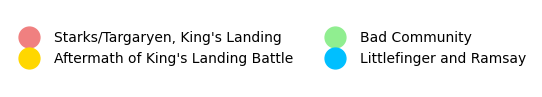

In [50]:
fig_legend, ax_legend = plt.subplots(figsize=(2,1))

# Hardcoding each legend entry
ax_legend.plot([], [], color="LightCoral", marker='o', markersize=15, linestyle='None', label="Starks/Targaryen, King's Landing")
ax_legend.plot([], [], color="Gold", marker='o', markersize=15, linestyle='None', label="Aftermath of King's Landing Battle")
ax_legend.plot([], [], color="LightGreen", marker='o', markersize=15, linestyle='None', label="Bad Community")
ax_legend.plot([], [], color="DeepSkyBlue", marker='o', markersize=15, linestyle='None', label="Littlefinger and Ramsay")

ax_legend.legend(loc='center', frameon=False, ncol=2)
ax_legend.axis('off')

plt.show()

### Louvain

In [51]:
louvain_comm = nx.community.louvain_communities(G, seed=123)
n_comm_louvain = len(louvain_comm)
print("Number of communities detected:", n_comm_louvain)

Number of communities detected: 7


In [52]:
# Convert communities to lists and print each one
print("List of the characters, divided per communities:")
for idx, community in enumerate(louvain_comm):
    print(f"Community {idx + 1}: {community}")

List of the characters, divided per communities:
Community 1: {'ARTHUR_CHILD', 'VARYS', 'BLACK_HAIRED_PROSTITUTE', 'LORAS', 'DORAN', 'ROBB_DWARF', 'CAMELLO', 'GERARD', 'WILLIAM', 'LOLLYS', 'CLARENZO', 'DIRAH', 'NYMERIA', 'ENDREW', 'FOOL', 'TYENE', 'AERYS', 'MAREI', 'IZEMBARO', 'LEO_LEFFORD', 'ROBERT', 'MAESTER_DORNE', 'MAGGY', 'OLYVAR', 'ROS', 'LITTLEFINGER', 'ORSON', 'TRYSTANE', 'JORY_CASSEL', 'DORNISH_LORD', 'MUSICIAN', 'LADY_CRANE', 'PYCELLE', 'TARYN_MANT', 'STANNIS_DWARF', 'LHARA', 'QYBURN', 'AREO', 'ADDAM_MARBRAND', 'MALKO', 'RED_PRIEST', 'SALLADHOR', 'ILYN_PAYNE', 'DAISY', 'RENLY', 'FALYSE', 'JOANNA', 'SEPTA_MORDANE', 'MELARA', 'LUTHOR', 'SELWYN', 'VIOLA', 'MOUNTAIN', 'MORGANS_FRIEND', 'TYWIN', 'PROTESTER', 'COLEN', 'OBERYN', 'HIGH_SEPTON', 'JOFFREY_DWARF', 'BALERION', 'ELIA', 'JON_ARRYN', 'OBARA', 'MARTHA', 'LANCEL', 'HARREN', 'CERSEI', 'PODRICK', 'SORCERER', 'HUGH_OF_THE_VALE', 'KEVAN', 'CERSEIS_BABY', 'BALON_DWARF', 'BOBONO', 'OLENNA', 'TYRION', 'TOMMEN', 'ELLARIA', 'SEPTA_UNE

In [53]:
community_graph_layout_louvain = nx.spring_layout(G)
# Prepare colors for the communities
colors = ["LightCoral", "Gold", "LightGreen", "DeepSkyBlue", "Orchid", "MistyRose", "Cyan", "Orange", "Red", "DarkRed", "DarkGreen"]
node_colors = []
node_sizes = []

for node in G.nodes():
    for i, community in enumerate(louvain_comm):
        if node in community:
            node_colors.append(colors[i % len(colors)])
            node_sizes.append(70)
            break

# Add positions to igraph nodes
positions = community_graph_layout_louvain
g.vs["x"] = [positions[node][0] for node in G.nodes()]
g.vs["y"] = [positions[node][1] for node in G.nodes()]


# Plot the graph with igraph
fig, ax = plt.subplots(figsize=(45, 35))
ax.set_xlim(min(g.vs["x"])-0.05, max(g.vs["x"])+0.05)
ax.set_ylim(min(g.vs["y"])-0.05, max(g.vs["y"])+0.05)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('auto')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)
ig.plot(
    g,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in positions.values()],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=g.vs["Label"],
    vertex_label_size = 10,
    edge_color = "grey"

)


Output hidden; open in https://colab.research.google.com to view.

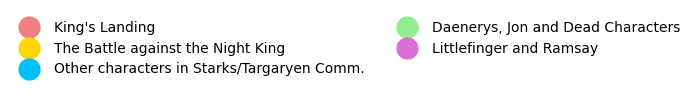

In [54]:
fig_legend, ax_legend = plt.subplots(figsize=(2,1))

# Hardcoding each legend entry
ax_legend.plot([], [], color="LightCoral", marker='o', markersize=15, linestyle='None', label="King's Landing")
ax_legend.plot([], [], color="Gold", marker='o', markersize=15, linestyle='None', label="The Battle against the Night King")
ax_legend.plot([], [], color="DeepSkyBlue", marker='o', markersize=15, linestyle='None', label="Other characters in Starks/Targaryen Comm.")
ax_legend.plot([], [], color="LightGreen", marker='o', markersize=15, linestyle='None', label="Daenerys, Jon and Dead Characters")
ax_legend.plot([], [], color="Orchid", marker='o', markersize=15, linestyle='None', label="Littlefinger and Ramsay")


ax_legend.legend(loc='center', frameon=False, ncol=2)
ax_legend.axis('off')

plt.show()

In [55]:
modularity_louvain = round(nx.community.modularity(G, louvain_comm),3)
print("The Modularity for the Louvain Method is",modularity_louvain)

The Modularity for the Louvain Method is 0.402


### Greedy Modularity Maximization

In [56]:
gmm_comm = nx.community.greedy_modularity_communities(G)
n_comm_gmm = len(gmm_comm)
print("The number of communities detected are:",n_comm_gmm)

The number of communities detected are: 4


In [57]:
print("List of the characters, divided per communities:")
for idx, community in enumerate(gmm_comm):
    print(f"Cluster {idx + 1}: {community}")

List of the characters, divided per communities:
Cluster 1: frozenset({'MARWYN', 'LITTLE_SAM', 'KARL_TANNER', 'BILLY', 'ROBETT', 'AXELL_FLORENT', 'VARLY', 'BORCAS', 'CATELYN', 'TEELA', 'ALLISER_THORNE', 'BENJEN', 'VIOLET', 'ALYS', 'DAVOS', 'ORELL', 'RODRIK', 'YOHN_ROYCE', 'BRAN', 'JORY_CASSEL', 'BERIC', 'SAM', 'BOLTON_GUARD', 'BRANDON_STARK', 'THREE_EYED_RAVEN', 'STEFFON', 'TORMUND', 'FARMER', 'CAPTAINS_DAUGHTER', 'QUENT', 'MELESSA', 'TORTURER', 'NIGHT_KING', 'LUKE', 'JAREMY_RYKKER', 'YGRITTE', 'MOLES_TOWN_WHORE', 'JON', 'MAGNAR', 'PORTAN', 'LEAF', 'ANYA_WAYNWOOD', 'JOJEN', 'BLACK_LORREN', 'BARRA', 'WAYMAR_ROYCE', 'ARTHUR', 'FARLEN', 'OTHELL_YARWYCK', 'ROYCE', 'BRAND', 'ROBB', 'EDDISON_TOLLETT', 'MAESTER_CITADEL', 'SMALLJON', 'DONNEL_HILL', 'GUYMON', 'HUGH_OF_THE_VALE', 'SISSY', 'CRASTERS_BABY', 'MORAG', 'LYANNA_MORMONT', 'STYR', 'DONGO_THE_GIANT', 'BRIAN', 'MHAEGEN', 'MANCE', 'BRIENNE', 'WUN_WUN', 'CRASTER', 'DAREON', 'FREY_DAUGHTER', 'ADRACK_HUMBLE', 'BERT', 'LYANNA', 'CRESSEN', 'OTH

In [58]:
community_graph_layout_gmm = nx.spring_layout(G)
# Prepare colors for the communities
colors = ["LightCoral", "Gold", "LightGreen", "DeepSkyBlue", "Orchid", "MistyRose", "Cyan", "Orange", "Red", "DarkRed", "DarkGreen"]
node_colors = []
node_sizes = []

for node in G.nodes():
    for i, community in enumerate(gmm_comm):
        if node in community:
            node_colors.append(colors[i % len(colors)])
            node_sizes.append(70)
            break

# Add positions to igraph nodes
positions = community_graph_layout_gmm
g.vs["x"] = [positions[node][0] for node in G.nodes()]
g.vs["y"] = [positions[node][1] for node in G.nodes()]


# Plot the graph with igraph
fig, ax = plt.subplots(figsize=(45, 35))
ax.set_xlim(min(g.vs["x"])-0.05, max(g.vs["x"])+0.05)
ax.set_ylim(min(g.vs["y"])-0.05, max(g.vs["y"])+0.05)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('auto')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

ig.plot(
    g,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in positions.values()],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=g.vs["Label"],
    vertex_label_size = 10,
    edge_color = "grey"

)


Output hidden; open in https://colab.research.google.com to view.

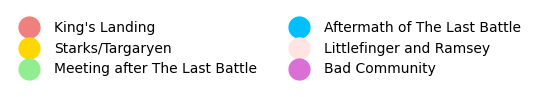

In [59]:
fig_legend, ax_legend = plt.subplots(figsize=(2,1))

# Hardcoding each legend entry
ax_legend.plot([], [], color="LightCoral", marker='o', markersize=15, linestyle='None', label="King's Landing")
ax_legend.plot([], [], color="Gold", marker='o', markersize=15, linestyle='None', label="Starks/Targaryen")
ax_legend.plot([], [], color="LightGreen", marker='o', markersize=15, linestyle='None', label="Meeting after The Last Battle")
ax_legend.plot([], [], color="DeepSkyBlue", marker='o', markersize=15, linestyle='None', label="Aftermath of The Last Battle")
ax_legend.plot([], [], color="MistyRose", marker='o', markersize=15, linestyle='None', label="Littlefinger and Ramsey")
ax_legend.plot([], [], color="Orchid", marker='o', markersize=15, linestyle='None', label="Bad Community")


ax_legend.legend(loc='center', frameon=False, ncol=2)
ax_legend.axis('off')

plt.show()

In [60]:
modularity_gmm = round(nx.community.modularity(G, gmm_comm),3)
print("The modularity for Greedy Modularity Maximization is", modularity_gmm)

The modularity for Greedy Modularity Maximization is 0.348


### Spectral Clustering

In [61]:
from sklearn.cluster import SpectralClustering

adj_matrix = nx.to_numpy_array(G)

num_clusters = 6  # Specify the number of communities
spectral_clustering = SpectralClustering(n_clusters=num_clusters, affinity='precomputed', random_state=30)
labels = spectral_clustering.fit_predict(adj_matrix)

community_dict = {node: labels[i] for i, node in enumerate(G.nodes())}
sc_comm = [[] for _ in range(num_clusters)]
for node, comm in community_dict.items():
  sc_comm[comm].append(node)

n_comm_sc = len(sc_comm)

print(f"Spectral Clustering detected {n_comm_sc} communities")
print("List of the characters, divided per communities:")
for idx, community in enumerate(sc_comm):
    print(f"Cluster {idx + 1}: {community}")

Spectral Clustering detected 6 communities
List of the characters, divided per communities:
Cluster 1: ['CATELYN', 'ROBB', 'MAESTER_LUWIN', 'WALDER', 'GREATJON_UMBER', 'RODRIK', 'JONOS_BRACKEN', 'RYGER_RIVERS', 'STEVRON_FREY', 'ASSASSIN', 'BALON', 'HOSTER', 'GALBART_GLOVER', 'RICKARD_KARSTARK', 'JOYEUSE', 'ROOSE_BOLTON', 'TALISA', 'DAGMER', 'ALTON', 'BLACK_LORREN', 'CAPTAINS_DAUGHTER', 'WINTERFELL_SHEPHERD', 'FARLEN', 'TORRHEN', 'DROWNED_PRIEST', 'PORTAN', 'QUENT', 'SEPTON', 'BILLY', 'FREY_DAUGHTER', 'RAMSAY', 'RENNICK', 'EDMURE', 'BRYNDEN', 'MYRANDA', 'VIOLET', 'TORTURER', 'ROSLIN', 'MARTYN', 'BLACK_WALDER', 'LOTHAR', 'WILLEM_LANNISTER', 'FREY_SEPTON', 'MERRY', 'RALF', 'TANSY', 'BOLTON_GUARD', 'FIRST_MATE', 'WALDA', 'ADRACK_HUMBLE', 'CERWYN', 'SON_OFWALDA', 'GUARD_CAPTAIN', 'MANDERLY', 'MINISA']
Cluster 2: ['OWEN', 'ALANNA']
Cluster 3: ['MAREI', 'MORGAN', 'RAY', 'LEM', 'FLYNN', 'CRAYAH', 'DIRAH', 'WILLIAM']
Cluster 4: ['NED', 'ROBERT', 'LITTLEFINGER', 'VARYS', 'ARYA', 'BRONN', 'TYRION

In [62]:


community_graph_layout = nx.spring_layout(G)

# Prepare colors for the communities
colors = ["LightCoral", "Gold", "LightGreen", "DeepSkyBlue", "Orchid", "MistyRose", "Cyan", "Orange", "Red", "DarkRed", "DarkGreen"]
node_colors = []
node_sizes = []

for node in G.nodes():
    for i, community in enumerate(sc_comm):
        if node in community:
            node_colors.append(colors[i % len(colors)])
            node_sizes.append(70)
            break

ig_G = ig.Graph.Weighted_Adjacency(adj_matrix.tolist(), mode=ig.ADJ_UNDIRECTED)
ig_G.vs["Label"] = list(G.nodes())

# Add positions to igraph nodes
positions = community_graph_layout
ig_G.vs["x"] = [positions[node][0] for node in G.nodes()]
ig_G.vs["y"] = [positions[node][1] for node in G.nodes()]

# Plot the graph with igraph
fig, ax = plt.subplots(figsize=(45, 35))
ax.set_xlim(min(ig_G.vs["x"])-0.05, max(ig_G.vs["x"])+0.05)
ax.set_ylim(min(ig_G.vs["y"])-0.05, max(ig_G.vs["y"])+0.05)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('auto')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

ig.plot(
    ig_G,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in positions.values()],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=ig_G.vs["Label"],
    vertex_label_size=10,
    edge_color="grey",
    edge_width=[weight * 2 for weight in ig_G.es['weight']]
)
plt.show()



Output hidden; open in https://colab.research.google.com to view.

In [63]:
modularity_sc = round(nx.community.modularity(G, sc_comm),3)
print("The modularity for Spectral Clustering is", modularity_sc)

The modularity for Spectral Clustering is 0.305


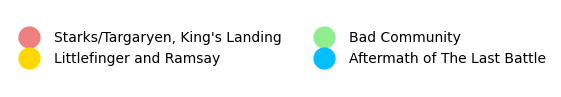

In [64]:
fig_legend, ax_legend = plt.subplots(figsize=(2,1))

# Hardcoding each legend entry
ax_legend.plot([], [], color="LightCoral", marker='o', markersize=15, linestyle='None', label="Starks/Targaryen, King's Landing")
ax_legend.plot([], [], color="Gold", marker='o', markersize=15, linestyle='None', label="Littlefinger and Ramsay")
ax_legend.plot([], [], color="LightGreen", marker='o', markersize=15, linestyle='None', label="Bad Community")
ax_legend.plot([], [], color="DeepSkyBlue", marker='o', markersize=15, linestyle='None', label="Aftermath of The Last Battle")

ax_legend.legend(loc='center', frameon=False, ncol=2)
ax_legend.axis('off')

plt.show()

## Robustness

### Random Nodes Removal

In [65]:
import random
import numpy as np
import networkx as nx

random_seed = 30
random.seed(random_seed)

def random_removal(graph, nodes):
    graph_copy = graph.copy()
    nodes_to_remove = random.sample(list(graph_copy.nodes()), nodes)
    graph_copy.remove_nodes_from(nodes_to_remove)
    return graph_copy

random_res = {}
graphs = []
n_sample_to_remove = [5, 10, 15, 20, 25, 30, 35]

for i in n_sample_to_remove:
    new_graph = random_removal(G, i)
    a = nx.connected_components(new_graph)
    components = [len(c) for c in sorted(a, key=len, reverse=True)]

    # Compute all the new metrics
    betweenness_centrality = nx.betweenness_centrality(new_graph)
    closeness_centrality = nx.closeness_centrality(new_graph)
    harmonic_centrality = nx.harmonic_centrality(new_graph)
    degree_centrality = nx.degree_centrality(new_graph)

    try:
        eigenvector_centrality = nx.eigenvector_centrality(new_graph)
    except nx.PowerIterationFailedConvergence:
        eigenvector_centrality = {node: float('nan') for node in new_graph.nodes()}

    # Five most central nodes
    first5_bcen = list(dict(sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)).keys())[0:5]
    first5_ccen = list(dict(sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)).keys())[0:5]
    first5_ecen = list(dict(sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)).keys())[0:5]
    first5_charm = list(dict(sorted(harmonic_centrality.items(), key=lambda x: x[1], reverse=True)).keys())[0:5]
    first5_cdegree = list(dict(sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)).keys())[0:5]

    # Mean centrality
    mean_bcen = np.mean(list(betweenness_centrality.values()))
    mean_ccen = np.mean(list(closeness_centrality.values()))
    mean_ecen = np.mean(list(eigenvector_centrality.values()))
    mean_charm = np.mean(list(harmonic_centrality.values()))
    mean_cdegree = np.mean(list(degree_centrality.values()))

    # Metric about the giant component
    Gcc = sorted(nx.connected_components(new_graph), key=len, reverse=True)
    giant_component = new_graph.subgraph(Gcc[0])

    avg_shortest_path = nx.average_shortest_path_length(giant_component)
    d = nx.diameter(giant_component)

    # Dictionary
    random_res[i] = {
        'average shortest path': avg_shortest_path,
        'diameter': d,
        '5 most central nodes - betweenness centrality': first5_bcen,
        '5 most central nodes - closeness centrality': first5_ccen,
        '5 most central nodes - eigenvector centrality': first5_ecen,
        '5 most central nodes - harmonic centrality': first5_charm,
        '5 most central nodes - degree centrality': first5_cdegree,
        'Mean betweenness centrality': mean_bcen,
        'Mean closeness centrality': mean_ccen,
        'Mean eigenvector centrality': mean_ecen,
        'Mean harmonic centrality': mean_charm,
        'Mean degree centrality': mean_cdegree,
        'number of components': len(components)
    }
    graphs.append(new_graph)

# Output the results
for k, v in random_res.items():
    print(f"Nodes removed: {k}")
    for metric, value in v.items():
        print(f"{metric}: {value}")
    print("\n")


Nodes removed: 5
average shortest path: 2.6815057656038377
diameter: 6
5 most central nodes - betweenness centrality: ['TYRION', 'DAENERYS', 'ARYA', 'JON', 'THEON']
5 most central nodes - closeness centrality: ['TYRION', 'JON', 'SANSA', 'JAIME', 'ARYA']
5 most central nodes - eigenvector centrality: ['TYRION', 'SANSA', 'JAIME', 'JON', 'ARYA']
5 most central nodes - harmonic centrality: ['TYRION', 'JON', 'SANSA', 'ARYA', 'JAIME']
5 most central nodes - degree centrality: ['TYRION', 'JON', 'SANSA', 'ARYA', 'DAENERYS']
Mean betweenness centrality: 0.0042462266808177725
Mean closeness centrality: 0.38077076148954575
Mean eigenvector centrality: 0.029760163371386657
Mean harmonic centrality: 161.0181742043551
Mean degree centrality: 0.0328974849056365
number of components: 1


Nodes removed: 10
average shortest path: 2.689767211232319
diameter: 6
5 most central nodes - betweenness centrality: ['TYRION', 'DAENERYS', 'ARYA', 'JON', 'THEON']
5 most central nodes - closeness centrality: ['TYRIO

In [66]:
for i in n_sample_to_remove:
  print(random_res[i])

{'average shortest path': 2.6815057656038377, 'diameter': 6, '5 most central nodes - betweenness centrality': ['TYRION', 'DAENERYS', 'ARYA', 'JON', 'THEON'], '5 most central nodes - closeness centrality': ['TYRION', 'JON', 'SANSA', 'JAIME', 'ARYA'], '5 most central nodes - eigenvector centrality': ['TYRION', 'SANSA', 'JAIME', 'JON', 'ARYA'], '5 most central nodes - harmonic centrality': ['TYRION', 'JON', 'SANSA', 'ARYA', 'JAIME'], '5 most central nodes - degree centrality': ['TYRION', 'JON', 'SANSA', 'ARYA', 'DAENERYS'], 'Mean betweenness centrality': 0.0042462266808177725, 'Mean closeness centrality': 0.38077076148954575, 'Mean eigenvector centrality': 0.029760163371386657, 'Mean harmonic centrality': 161.0181742043551, 'Mean degree centrality': 0.0328974849056365, 'number of components': 1}
{'average shortest path': 2.689767211232319, 'diameter': 6, '5 most central nodes - betweenness centrality': ['TYRION', 'DAENERYS', 'ARYA', 'JON', 'THEON'], '5 most central nodes - closeness centr

In [67]:
#Get the nodes that now are without any link
for i in range(len(n_sample_to_remove)):
  Gcc = sorted(nx.connected_components(graphs[i]), key=len, reverse=True)
  if len(Gcc) > 1:
    Gcc.pop(0)
    print("Isolated nodes in the network: ",i, "is", Gcc)

Isolated nodes in the network:  1 is [{'MINISA'}]
Isolated nodes in the network:  2 is [{'LITTLE_BIRD'}, {'FATHER_SEAWORTH'}, {'MARYA'}, {'PROTESTER'}, {'ORSON'}, {'FALYSE'}, {'BLACK_HAIRED_PROSTITUTE'}, {'MALKO'}]
Isolated nodes in the network:  4 is [{'COOPER', 'DONNEL_HILL'}]
Isolated nodes in the network:  5 is [{'DENYS'}]


In [68]:
# based on centrality

def centrality_removal(graph, nodes):
    graph_copy = graph.copy()
    nodes_to_remove = list(centrality_df["Most central character - Betweenness"][0:nodes]) #list of the nodes to remove
    graph_copy.remove_nodes_from(nodes_to_remove)   #remove the nodes
    return graph_copy

centrality_res = {}           #dictionary in with append the new metrics
graphs = []                   #list of the new graphs to visualize
n_sample_to_remove = [1,3,5]  #list of number of nodes to delete

for i in n_sample_to_remove:
    new_graph = centrality_removal(G, i)      #remove nodes
    a = nx.connected_components(new_graph)    #get the components
    components = [len(c) for c in sorted(a, key=len, reverse=True)] #count the number of componentes (>1 if disconnected)
    #compute all the new metrics
    #five most central nodes
    first5_bcen = list(dict(sorted(nx.betweenness_centrality(new_graph).items(), key=lambda x:x[1], reverse=True)).keys())[0:5]
    first5_ccen = list(dict(sorted(nx.closeness_centrality(new_graph).items(), key=lambda x:x[1], reverse=True)).keys())[0:5]
    first5_ecen = list(dict(sorted(nx.eigenvector_centrality(new_graph).items(), key=lambda x:x[1], reverse=True)).keys())[0:5]
    first5_charm = list(dict(sorted(nx.harmonic_centrality(new_graph).items(), key=lambda x:x[1], reverse=True)).keys())[0:5]
    first5_cdegree = list(dict(sorted(nx.degree_centrality(new_graph).items(), key=lambda x:x[1], reverse=True)).keys())[0:5]

    #mean centrality
    mean_bcen = np.mean(list(nx.betweenness_centrality(new_graph).values()))
    mean_ccen = np.mean(list(nx.closeness_centrality(new_graph).values()))
    mean_ecen = np.mean(list(nx.eigenvector_centrality(new_graph).values()))
    mean_charm = np.mean(list(nx.harmonic_centrality(new_graph).values()))
    mean_cdegree = np.mean(list(nx.degree_centrality(new_graph).values()))

    #metric about the giant component - impossible to compute otherwise
    Gcc = sorted(nx.connected_components(new_graph), key=len, reverse=True)
    giant_component = G.subgraph(Gcc[0])

    avg_shortest_path = nx.average_shortest_path_length(giant_component)    #average shortest path
    d = nx.diameter(giant_component)                                        #diameter

    #dictionary
    centrality_res[i] = {'average shortest path': avg_shortest_path,
                         'diameter': d,
                         #'5 most central nodes - betwennes centrality': first5_bcen,
                         #'5 most central nodes - closeness centrality': first5_ccen,
                         #'5 most central nodes - eigenvector centrality': first5_ecen,
                         #'5 most central nodes - harmonic centrality': first5_ccen,
                         #'5 most central nodes - degree centrality': first5_ecen,
                         'Mean betwennes centrality': mean_bcen,
                         'Mean closeness centrality': mean_ccen,
                         'Mean eigenvector centrality': mean_ecen,
                         'Mean harmonic centrality': mean_ccen,
                         'Mean degree centrality': mean_ecen,
                         'number of components': len(components)}
    graphs.append(new_graph)

In [69]:
#Get the nodes that now are without any link

Gcc = sorted(nx.connected_components(graphs[0]), key=len, reverse=True)
Gcc.pop(0)
print("Isolated nodes in the first network: ",Gcc)

Gcc = sorted(nx.connected_components(graphs[1]), key=len, reverse=True)
Gcc.pop(0)
print("Isolated nodes in the second network: ",Gcc)

Gcc = sorted(nx.connected_components(graphs[2]), key=len, reverse=True)
Gcc.pop(0)
print("Isolated nodes in the third network: ",Gcc)

Isolated nodes in the first network:  [{'PROTESTER'}, {'ORSON'}, {'BLACK_HAIRED_PROSTITUTE'}]
Isolated nodes in the second network:  [{'VISENYA', 'RHAENYS'}, {'ALANNA', 'OWEN'}, {'STABLE_BOY'}, {'PROTESTER'}, {'TERNESIO_TERYS'}, {'ORSON'}, {'BLACK_HAIRED_PROSTITUTE'}]
Isolated nodes in the third network:  [{'VISENYA', 'RHAENYS'}, {'ALANNA', 'OWEN'}, {'STABLE_BOY'}, {'CAPTAINS_DAUGHTER'}, {'DROWNED_PRIEST'}, {'PROTESTER'}, {'TORTURER'}, {'TERNESIO_TERYS'}, {'ORSON'}, {'BLACK_HAIRED_PROSTITUTE'}, {'BRIAN'}]


### Preferential Attachment - Link Prediction

In [70]:
#preferential attachment
preds = nx.preferential_attachment(G, list(nx.non_edges(G)))

first_node = []
sec_node = []
score = []

for u, v, p in preds:
  first_node.append(u)
  sec_node.append(v)
  score.append(p)

preferential_attachment = pd.DataFrame(data = list(zip(first_node, sec_node, score)),
                             columns = ['First node', 'Second node', 'Score'])

preferential_attachment = preferential_attachment.sort_values("Score", ascending=False)
preferential_attachment

First node    Second node  Score
46964     CERSEI            SAM   6708
37587    JOFFREY       DAENERYS   6324
60278      BRONN           ARYA   6305
66098        JON          TYWIN   6090
51231        NED            SAM   6084
...          ...            ...    ...
75911     FALYSE        RENNICK      1
75909     FALYSE           BERT      1
64461      QUENT           BERT      1
64457      QUENT  FREY_DAUGHTER      1
75193      ORSON         GATINS      1

[78369 rows x 3 columns]

### Node Prediction

In [71]:
#Returns a random graph using Barabási–Albert preferential attachment
#A graph of nodes is grown by attaching new nodes each with edges that are preferentially attached to existing nodes with high degree.

#the first number n is how many node we want to have in the new graph (old + new nodes)
#and the second number m is the umber of edges to attach from a new node to existing nodes

#Barabási–Albert network must have m >= 1 and m < n
one_node_one_edge = nx.barabasi_albert_graph(len(G.nodes())+1, 1, seed=30, initial_graph=G)

In [72]:
#adding a new node - preferential attachment
preds = nx.preferential_attachment(one_node_one_edge, one_node_one_edge.edges())

first_node = []
sec_node = []
score = []

for u, v, p in preds:
  first_node.append(u)
  sec_node.append(v)
  score.append(p)

preferential_attachment = pd.DataFrame(data = list(zip(first_node, sec_node, score)),
                             columns = ['First node', 'Second node', 'Score'])

preferential_attachment = preferential_attachment.sort_values("Score", ascending=False)
preferential_attachment[(preferential_attachment["First node"] == len(G)) | (preferential_attachment["Second node"] == len(G))]

First node Second node  Score
2521      SISSY         403      9

In [73]:
#Returns a random graph using Barabási–Albert preferential attachment
#A graph of nodes is grown by attaching new nodes each with edges that are preferentially attached to existing nodes with high degree.

#the first number n is how many node we want to have in the new graph (old + new nodes)
#and the second number m is the umber of edges to attach from a new node to existing nodes

#Barabási–Albert network must have m >= 1 and m < n
one_node_ten_edge = nx.barabasi_albert_graph(len(G.nodes())+1, 10, seed=30, initial_graph=G)

In [74]:
#adding a new node - preferential attachment
preds = nx.preferential_attachment(one_node_ten_edge, one_node_ten_edge.edges())

first_node = []
sec_node = []
score = []

for u, v, p in preds:
  first_node.append(u)
  sec_node.append(v)
  score.append(p)

preferential_attachment = pd.DataFrame(data = list(zip(first_node, sec_node, score)),
                             columns = ['First node', 'Second node', 'Score'])

preferential_attachment = preferential_attachment.sort_values("Score", ascending=False)
preferential_attachment[(preferential_attachment["First node"] == len(G)) | (preferential_attachment["Second node"] == len(G))]

First node Second node  Score
462         SAM         403    790
1729      HOUND         403    700
286       JORAH         403    680
2138       YARA         403    390
1502      RENLY         403    300
1832  JON_ARRYN         403    140
2197     DAGMER         403    110
2626     DICKON         403    110
2528      SISSY         403     90
2630     MARWYN         403     60

In [75]:
#Returns a random graph using Barabási–Albert preferential attachment
#A graph of nodes is grown by attaching new nodes each with edges that are preferentially attached to existing nodes with high degree.

#the first number n is how many node we want to have in the new graph (old + new nodes)
#and the second number m is the umber of edges to attach from a new node to existing nodes

#Barabási–Albert network must have m >= 1 and m < n
nodes_to_add = 10
ten_node_three_edge = nx.barabasi_albert_graph(len(G.nodes())+nodes_to_add, int(davg), seed=30, initial_graph=G)

In [76]:
#adding a new node - preferential attachment
preds = nx.preferential_attachment(ten_node_three_edge, ten_node_three_edge.edges())

first_node = []
sec_node = []
score = []

for u, v, p in preds:
  first_node.append(u)
  sec_node.append(v)
  score.append(p)

preferential_attachment = pd.DataFrame(data = list(zip(first_node, sec_node, score)),
                             columns = ['First node', 'Second node', 'Score'])

preferential_attachment = preferential_attachment.sort_values("Score", ascending=False)
filtered_preferential_attachment = preferential_attachment[(preferential_attachment['First node'].isin(np.arange(len(G.nodes()), len(G.nodes())+nodes_to_add))) |
                                                           (preferential_attachment['Second node'].isin(np.arange(len(G.nodes()), len(G.nodes())+nodes_to_add)))]
filtered_preferential_attachment

First node Second node  Score
975        TYRION         406   1703
974        TYRION         405   1703
976        TYRION         410   1703
695          ARYA         403   1386
396           JON         411   1378
...           ...         ...    ...
2353     REGINALD         409     39
1922         MAGO         409     39
2357      RHAENYS         412     39
2689  LORD_WEEBLY         410     39
2760      WILLIAM         407     28

[130 rows x 3 columns]

In [77]:
filtered_preferential_attachment_counts = filtered_preferential_attachment['First node'].value_counts()
filtered_preferential_attachment_counts

First node
JOFFREY        4
DAENERYS       4
TYRION         3
VARYS          3
JORAH          3
              ..
TOMMEN         1
RAMSAY         1
MERYN_TRANT    1
RENLY          1
WILLIAM        1
Name: count, Length: 101, dtype: int64

In [78]:
filtered_chars =  list(dict(filtered_preferential_attachment_counts).keys())[0:10]
filtered_values = list(dict(filtered_preferential_attachment_counts).values())[0:10]

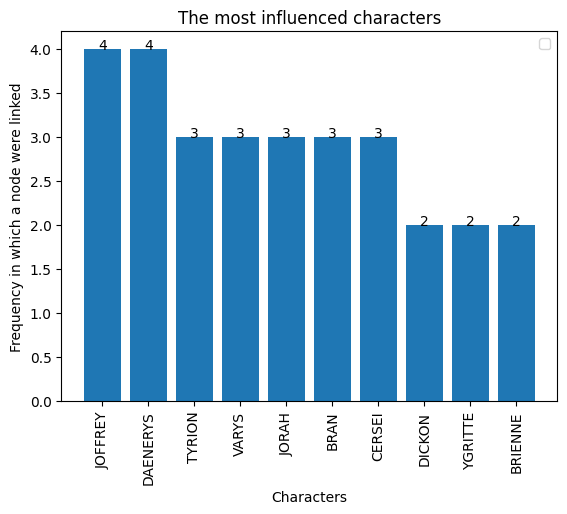

In [79]:
#Modularities per method

"""
Function that we'll use later for add the value in barplots
"""
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

plt.bar(filtered_chars,filtered_values)
addlabels(filtered_chars,filtered_values)
plt.legend()
plt.xticks(rotation='vertical')
plt.xlabel("Characters")
plt.ylabel("Frequency in which a node were linked")
plt.title("The most influenced characters")
plt.show()